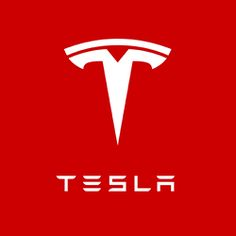

# KDE DENSITY

In [1]:
import yfinance as yf

# Define the ticker symbols for Tesla and Lucid stocks
tickers = ['TSLA', 'LCID', 'GM']

# Download the stock data for the tickers from Yahoo Finance
stock_data = yf.download(tickers, start='2020-01-01', end='2022-12-31')

# Print the first 5 rows of the downloaded data
print(stock_data.head())


[*********************100%***********************]  3 of 3 completed
                           Adj Close                      Close       \
                                  GM LCID       TSLA         GM LCID   
Date                                                                   
2020-01-02 00:00:00-05:00  36.678165  NaN  28.684000  37.380001  NaN   
2020-01-03 00:00:00-05:00  35.638062  NaN  29.534000  36.320000  NaN   
2020-01-06 00:00:00-05:00  35.167076  NaN  30.102667  35.840000  NaN   
2020-01-07 00:00:00-05:00  34.490032  NaN  31.270666  35.150002  NaN   
2020-01-08 00:00:00-05:00  33.999424  NaN  32.809334  34.650002  NaN   

                                           High                        Low  \
                                TSLA         GM LCID       TSLA         GM   
Date                                                                         
2020-01-02 00:00:00-05:00  28.684000  37.380001  NaN  28.713333  36.549999   
2020-01-03 00:00:00-05:00  29.534000  36.9

In [2]:
# Select the training period
training_period = stock_data.loc['2020-01-01':'2022-12-31']

# Calculate the summary statistics
summary_statistics = training_period.describe()

# Print the summary statistics
# print(summary_statistics)

print(training_period)

                           Adj Close                        Close        \
                                  GM  LCID        TSLA         GM  LCID   
Date                                                                      
2020-01-02 00:00:00-05:00  36.678165   NaN   28.684000  37.380001   NaN   
2020-01-03 00:00:00-05:00  35.638062   NaN   29.534000  36.320000   NaN   
2020-01-06 00:00:00-05:00  35.167076   NaN   30.102667  35.840000   NaN   
2020-01-07 00:00:00-05:00  34.490032   NaN   31.270666  35.150002   NaN   
2020-01-08 00:00:00-05:00  33.999424   NaN   32.809334  34.650002   NaN   
...                              ...   ...         ...        ...   ...   
2022-12-23 00:00:00-05:00  33.751366  6.70  123.150002  33.830002  6.70   
2022-12-27 00:00:00-05:00  33.242550  6.20  109.099998  33.320000  6.20   
2022-12-28 00:00:00-05:00  32.454388  6.38  112.709999  32.529999  6.38   
2022-12-29 00:00:00-05:00  33.591736  6.70  121.820000  33.669998  6.70   
2022-12-30 00:00:00-05:00

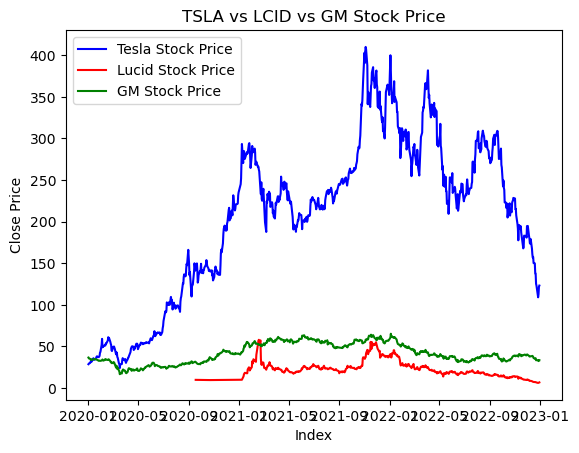

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(training_period['Adj Close']['TSLA'], label='Tesla Stock Price', color='blue', linestyle='-')
plt.plot(training_period['Adj Close']['LCID'], label='Lucid Stock Price', color='red', linestyle='-')
plt.plot(training_period['Adj Close']['GM'], label='GM Stock Price', color='green', linestyle='-')
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.title("TSLA vs LCID vs GM Stock Price")
plt.legend()
plt.show()

[*********************100%***********************]  4 of 4 completed
               GM        LCID        RIVN        TSLA
count  756.000000  576.000000  287.000000  756.000000
mean    41.888317   21.615620   48.406882  206.365502
std     12.079097   10.173444   29.690252   95.856975
min     16.685661    6.200000   17.740000   24.081333
25%     32.716669   14.275000   30.719999  138.270828
50%     39.758142   19.990000   34.490002  223.651665
75%     53.826161   25.295001   58.605000  276.565002
max     65.292587   58.049999  172.009995  409.970001


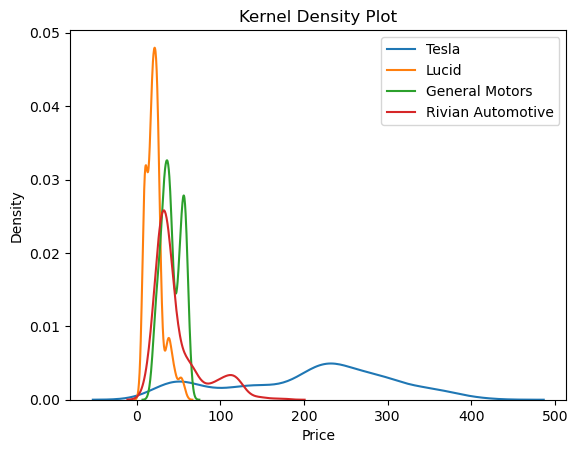

In [32]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Define the stock symbols and the training period
symbols = ['TSLA', 'LCID', 'GM', 'RIVN']
start_date = '2020-01-01'
end_date = '2022-12-31'

# Collect the stock data from Yahoo Finance
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Calculate the summary statistics for the training period
training_period = data.loc[start_date:end_date]
summary_stats = training_period.describe()

# Print the summary statistics
print(summary_stats)

# Plot the kernel density for Tesla and Lucid stocks
sns.kdeplot(training_period['TSLA'], label='Tesla')
sns.kdeplot(training_period['LCID'], label='Lucid')
sns.kdeplot(training_period['GM'], label='General Motors')
sns.kdeplot(training_period['RIVN'], label='Rivian Automotive')
plt.xlabel('Price')
plt.title('Kernel Density Plot')
plt.legend()
plt.show()


[*********************100%***********************]  4 of 4 completed
               GM        LCID        RIVN        TSLA
count  503.000000  503.000000  287.000000  503.000000
mean     0.493899    0.330393    0.198787    0.506672
std      0.278619    0.188264    0.192456    0.185382
min      0.000000    0.000000    0.000000    0.000000
25%      0.225670    0.225169    0.084138    0.379239
50%      0.555492    0.306075    0.108576    0.472341
75%      0.747347    0.386982    0.264893    0.624046
max      1.000000    1.000000    1.000000    1.000000


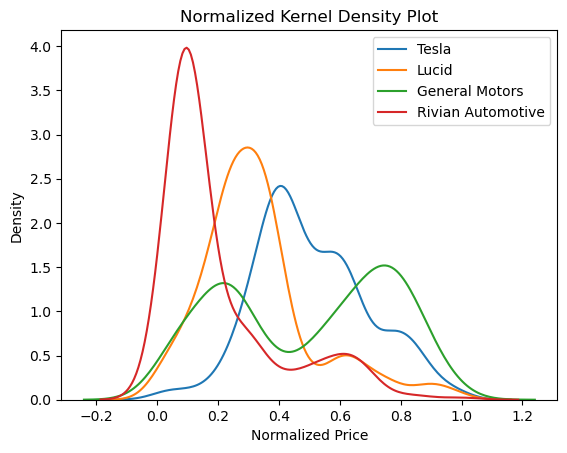

In [29]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Define the stock symbols and the training period
symbols = ['TSLA', 'LCID', 'GM', 'RIVN']
start_date = '2021-01-01'
end_date = '2022-12-31'

# Collect the stock data from Yahoo Finance
data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Normalize the stock prices using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Convert the normalized data back to a DataFrame
normalized_data = pd.DataFrame(normalized_data, columns=data.columns, index=data.index)

# Calculate the summary statistics for the training period
training_period = normalized_data.loc[start_date:end_date]
summary_stats = training_period.describe()

# Print the summary statistics
print(summary_stats)

# Plot the kernel density for Tesla and Lucid stocks
sns.kdeplot(training_period['TSLA'], label='Tesla')
sns.kdeplot(training_period['LCID'], label='Lucid')
sns.kdeplot(training_period['GM'], label='General Motors')
sns.kdeplot(training_period['RIVN'], label='Rivian Automotive')
plt.xlabel('Normalized Price')
plt.title('Normalized Kernel Density Plot')
plt.legend()
plt.show()


# CAPM & FAMMA FRENCH 

In [266]:
STOCK

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [267]:
STOCK = STOCK.reset_index().rename(columns={'index': 'Date'})
STOCK

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...
751,2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
752,2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
753,2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
754,2022-12-29 00:00:00-05:00,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [268]:
stock_prices = STOCK['Adj Close']
returns = stock_prices.pct_change()
returns = returns.dropna()
returns.name = "Returns"

In [269]:
returns

1      0.029633
2      0.019255
3      0.038801
4      0.049205
5     -0.021945
         ...   
751   -0.017551
752   -0.114089
753    0.033089
754    0.080827
755    0.011164
Name: Returns, Length: 755, dtype: float64

In [270]:
ff3_daily = pd.read_csv('F-F_Research_Data_Factors_daily (2).csv')

In [271]:
ff3_daily['Date'].info()
ff3_daily['Date']

<class 'pandas.core.series.Series'>
RangeIndex: 756 entries, 0 to 755
Series name: Date
Non-Null Count  Dtype
--------------  -----
756 non-null    int64
dtypes: int64(1)
memory usage: 6.0 KB


0      20200102
1      20200103
2      20200106
3      20200107
4      20200108
         ...   
751    20221223
752    20221227
753    20221228
754    20221229
755    20221230
Name: Date, Length: 756, dtype: int64

In [272]:
ff3_daily['Date'] = pd.to_datetime(ff3_daily['Date'], format='%Y%m%d')
#ff3_daily['Date'] = ff3_daily['Date'].dt.tz_localize(None)
STOCK['Date'] = STOCK['Date'].dt.tz_localize(None)

STOCK['Returns'] = returns
ff_data = pd.merge(ff3_daily, STOCK, on='Date')
rf = ff_data['RF'].mean()
market_premium = ff_data['Mkt-RF'].mean()

In [273]:
ff_data['Returns'].fillna(0, inplace=True)
ff_data

,Date,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Returns
0,2020-01-02,0.86,-0.88,-0.34,0.006,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000
1,2020-01-03,-0.67,0.38,0.01,0.006,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633
2,2020-01-06,0.36,-0.07,-0.55,0.006,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255
3,2020-01-07,-0.19,-0.01,-0.25,0.006,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801
4,2020-01-08,0.47,-0.06,-0.64,0.006,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205
...,...,...,...,...,...,...,...,...,...,...,...,...
751,2022-12-23,0.51,-0.60,1.15,0.016,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551
752,2022-12-27,-0.51,-0.73,1.43,0.016,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089
753,2022-12-28,-1.23,-0.24,-0.29,0.016,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089
754,2022-12-29,1.87,1.26,-1.07,0.016,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827


In [274]:
X = ff_data['Mkt-RF']


In [275]:
ff3_daily

,Date,Mkt-RF,SMB,HML,RF
0,2020-01-02,0.86,-0.88,-0.34,0.006
1,2020-01-03,-0.67,0.38,0.01,0.006
2,2020-01-06,0.36,-0.07,-0.55,0.006
3,2020-01-07,-0.19,-0.01,-0.25,0.006
4,2020-01-08,0.47,-0.06,-0.64,0.006
...,...,...,...,...,...
751,2022-12-23,0.51,-0.60,1.15,0.016
752,2022-12-27,-0.51,-0.73,1.43,0.016
753,2022-12-28,-1.23,-0.24,-0.29,0.016
754,2022-12-29,1.87,1.26,-1.07,0.016


In [276]:
ff_data['Returns-RF-CAPM'] = ff3_daily['Mkt-RF'] - ff_data['RF']
y = ff_data['Returns-RF-CAPM']
c = sm.add_constant(X)
capm_model = sm.OLS(y, c)
result = capm_model.fit()
print(result.summary())
intercept, beta = result.params

                            OLS Regression Results                            
Dep. Variable:        Returns-RF-CAPM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.121e+08
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:52:35   Log-Likelihood:                 3056.1
No. Observations:                 756   AIC:                            -6108.
Df Residuals:                     754   BIC:                            -6099.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.000    -15.520      0.0

In [277]:
y

0      0.854
1     -0.676
2      0.354
3     -0.196
4      0.464
       ...  
751    0.494
752   -0.526
753   -1.246
754    1.854
755   -0.236
Name: Returns-RF-CAPM, Length: 756, dtype: float64

In [278]:
X.to_csv(r'CAPM.csv', index=False)

In [279]:
expected_return = rf + beta*market_premium
print("Expected monthly returns: " + str(expected_return))
yearly_return = expected_return * 12
print("Expected yearly returns: " + str(yearly_return))

Expected monthly returns: 0.04007321230795754
Expected yearly returns: 0.48087854769549043


In [280]:
stock_prices = STOCK['Adj Close']
# ff_data = ff_data.rename(columns={'Adj Close': 'Month_Rtn'})
ff_data

,Date,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Returns,Returns-RF-CAPM
0,2020-01-02,0.86,-0.88,-0.34,0.006,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.854
1,2020-01-03,-0.67,0.38,0.01,0.006,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633,-0.676
2,2020-01-06,0.36,-0.07,-0.55,0.006,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255,0.354
3,2020-01-07,-0.19,-0.01,-0.25,0.006,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801,-0.196
4,2020-01-08,0.47,-0.06,-0.64,0.006,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205,0.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2022-12-23,0.51,-0.60,1.15,0.016,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.494
752,2022-12-27,-0.51,-0.73,1.43,0.016,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,-0.526
753,2022-12-28,-1.23,-0.24,-0.29,0.016,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,-1.246
754,2022-12-29,1.87,1.26,-1.07,0.016,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,1.854


In [281]:
X = ff_data[['Mkt-RF', 'SMB', 'HML']]
y = ff_data['Returns-RF-CAPM']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                            OLS Regression Results                            
Dep. Variable:        Returns-RF-CAPM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.732e+07
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:52:38   Log-Likelihood:                 3056.6
No. Observations:                 756   AIC:                            -6105.
Df Residuals:                     752   BIC:                            -6087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.000    -15.519      0.0

In [282]:
b1

1.0001064872813255

In [283]:
X.to_csv(r'FF.csv', index=False)

In [284]:
y.to_csv(r'FF_Returns.csv', index=False)

In [285]:
ff_data

,Date,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Returns,Returns-RF-CAPM
0,2020-01-02,0.86,-0.88,-0.34,0.006,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.854
1,2020-01-03,-0.67,0.38,0.01,0.006,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633,-0.676
2,2020-01-06,0.36,-0.07,-0.55,0.006,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255,0.354
3,2020-01-07,-0.19,-0.01,-0.25,0.006,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801,-0.196
4,2020-01-08,0.47,-0.06,-0.64,0.006,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205,0.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2022-12-23,0.51,-0.60,1.15,0.016,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.494
752,2022-12-27,-0.51,-0.73,1.43,0.016,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,-0.526
753,2022-12-28,-1.23,-0.24,-0.29,0.016,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,-1.246
754,2022-12-29,1.87,1.26,-1.07,0.016,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,1.854


In [286]:
# Reset the index to create a 'Date' column
ff_data = ff_data.reset_index()


# Convert the "Date" column to datetime object in DataFrame
ff_data['Date'] = pd.to_datetime(ff_data['Date'])

In [287]:
ff_data.to_csv(r'Returns.csv', index=False)

In [288]:
ff_data

,index,Date,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Returns,Returns-RF-CAPM
0,0,2020-01-02,0.86,-0.88,-0.34,0.006,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.854
1,1,2020-01-03,-0.67,0.38,0.01,0.006,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633,-0.676
2,2,2020-01-06,0.36,-0.07,-0.55,0.006,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255,0.354
3,3,2020-01-07,-0.19,-0.01,-0.25,0.006,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801,-0.196
4,4,2020-01-08,0.47,-0.06,-0.64,0.006,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205,0.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,751,2022-12-23,0.51,-0.60,1.15,0.016,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.494
752,752,2022-12-27,-0.51,-0.73,1.43,0.016,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,-0.526
753,753,2022-12-28,-1.23,-0.24,-0.29,0.016,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,-1.246
754,754,2022-12-29,1.87,1.26,-1.07,0.016,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,1.854


In [289]:
rf = ff_data['RF'].mean()
market_premium = ff_data['Mkt-RF'].mean()
size_premium = ff_data['SMB'].mean()
value_premium = ff_data['HML'].mean()

print("Value of Risk-free rate: ", rf)
print("Value of Market Risk Premium: ", market_premium)
print("Value of Small minus big (SMB): ", size_premium)
print("Value of High minus Low (HML): ", value_premium)

Value of Risk-free rate:  0.0023968253968253963
Value of Market Risk Premium:  0.03767195767195752
Value of Small minus big (SMB):  0.004973544973544966
Value of High minus Low (HML):  0.020370370370370337


In [290]:
expected_daily_return = rf + b1 * market_premium + b2 * size_premium + b3 * value_premium 
expected_yearly_return = expected_monthly_return * 365
print("Expected monthly return: " + str(expected_daily_return))
print("Expected yearly return: " + str(expected_yearly_return))

Expected monthly return: 0.040075084575487405
Expected yearly return: 1.0020812275508255


In [257]:

#df_join = pd.merge(df_join,ff_data, on='Date')

ff_data

,level_0,index,Date,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,Returns,Returns-RF-CAPM
0,0,0,2020-01-02,0.86,-0.88,-0.34,0.006,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.854
1,1,1,2020-01-03,-0.67,0.38,0.01,0.006,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633,-0.676
2,2,2,2020-01-06,0.36,-0.07,-0.55,0.006,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255,0.354
3,3,3,2020-01-07,-0.19,-0.01,-0.25,0.006,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801,-0.196
4,4,4,2020-01-08,0.47,-0.06,-0.64,0.006,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205,0.464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,751,751,2022-12-23,0.51,-0.60,1.15,0.016,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0.494
752,752,752,2022-12-27,-0.51,-0.73,1.43,0.016,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,-0.526
753,753,753,2022-12-28,-1.23,-0.24,-0.29,0.016,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,-1.246
754,754,754,2022-12-29,1.87,1.26,-1.07,0.016,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,1.854


# PCA

In [326]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 12, 31)

ticker = 'TSLA'
STOCK = yf.download(ticker, start=start, end=end)
print(STOCK)


[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00   28.299999   28.713333   28.114000   28.684000   
2020-01-03 00:00:00-05:00   29.366667   30.266666   29.128000   29.534000   
2020-01-06 00:00:00-05:00   29.364668   30.104000   29.333332   30.102667   
2020-01-07 00:00:00-05:00   30.760000   31.441999   30.224001   31.270666   
2020-01-08 00:00:00-05:00   31.580000   33.232666   31.215334   32.809334   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  126.370003  128.619995  121.019997  123.150002   
2022-12-27 00:00:00-05:00  117.500000  119.669998  108.760002  109.099998   
2022-12-28 00:00:00-05:00  110.349998  116.269997  108.239998  112.709999   
2022-12-29 00:00:00-05:00  120.389999  123.570000  117.500000  121.820000   
2022-12

          PC1       PC2
0    4.730412  0.006633
1    4.397660 -1.089034
2    4.699806  0.031872
3    5.230526  1.946198
4    5.107647  1.560092
..        ...       ...
750  2.112094 -0.257754
751  2.477385  0.068027
752  2.585370  0.165979
753  2.389407  0.232607
754  2.148322 -0.364663

[755 rows x 2 columns]


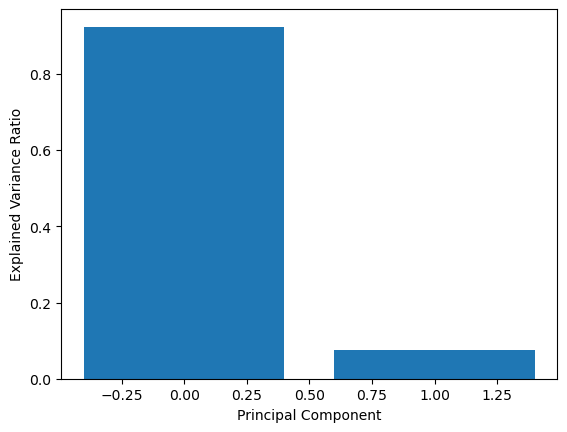

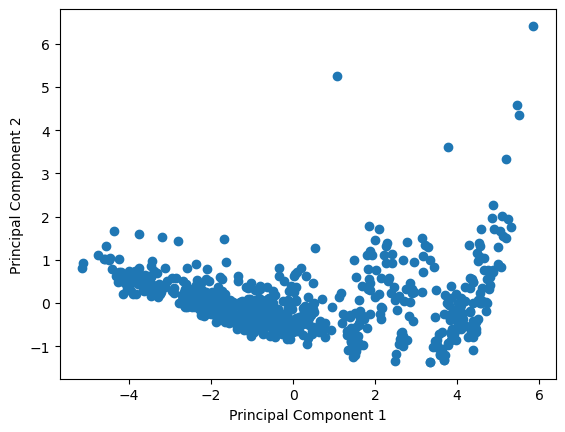

In [335]:

# Extract the relevant columns for the PCA analysis
tesla_pca_data = tesla[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
tesla_pca_data = tesla_pca_data.dropna()

# Standardize the data
scaler = StandardScaler()
tesla_pca_data_scaled = scaler.fit_transform(tesla_pca_data)

# Run the PCA model with 2 principal components
pca = PCA(n_components=2)
tesla_pca = pca.fit_transform(tesla_pca_data_scaled)
tesla_pca_df = pd.DataFrame(tesla_pca, columns=['PC1', 'PC2'])
print(tesla_pca_df)

# Plot the explained variance ratio
plt.bar(range(2), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot the principal components
plt.scatter(tesla_pca[:, 0], tesla_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# ADS

In [226]:
import yfinance as yf
import datetime

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2022, 12, 31)

ticker = 'TSLA'
df_tsla = yf.download(ticker, start=start, end=end)

# Reset the index to make 'Date' a column in the DataFrame
df_tsla = df_tsla.reset_index()

df_tsla.to_csv('tsla-stock.csv')

[*********************100%***********************]  1 of 1 completed


In [227]:
df_tsla['Yest_Close']  = df_tsla['Adj Close'].shift(1)
df_tsla['stock_return'] = (df_tsla['Adj Close']-df_tsla['Yest_Close'])/(df_tsla['Yest_Close'])
df_tsla

,Date,Open,High,Low,Close,Adj Close,Volume,Yest_Close,stock_return
0,2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN,NaN
1,2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,28.684000,0.029633
2,2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,29.534000,0.019255
3,2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,30.102667,0.038801
4,2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,31.270666,0.049205
...,...,...,...,...,...,...,...,...,...
751,2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,125.349998,-0.017551
752,2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,123.150002,-0.114089
753,2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,109.099998,0.033089
754,2022-12-29 00:00:00-05:00,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,112.709999,0.080827


In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

df_ads=pd.read_csv("ADS_All_Vintages.csv")
df_ads

,Date,ADS_INDEX_010920,ADS_INDEX_011020,ADS_INDEX_011620,ADS_INDEX_011720,ADS_INDEX_012320,ADS_INDEX_013020,ADS_INDEX_013120,ADS_INDEX_020620,ADS_INDEX_020720,...,ADS_INDEX_031023,ADS_INDEX_031623,ADS_INDEX_031723,ADS_INDEX_032323,ADS_INDEX_033023,ADS_INDEX_033123,ADS_INDEX_040623,ADS_INDEX_040723,ADS_INDEX_041323,ADS_INDEX_041423
0,2020:01:01,0.347690,0.067755,0.121871,-0.145601,-0.151486,-0.169667,-0.197031,-0.156506,-0.118034,...,-0.302366,-0.302366,-0.302366,-0.302366,-0.283096,-0.283096,-0.298894,-0.298894,-0.298894,-0.298894
1,2020:01:02,0.345035,0.068215,0.124182,-0.140197,-0.146356,-0.164557,-0.191586,-0.149066,-0.108744,...,-0.285704,-0.285704,-0.285704,-0.285704,-0.268896,-0.268896,-0.284887,-0.284887,-0.284887,-0.284887
2,2020:01:03,0.342036,0.068276,0.126104,-0.135236,-0.141669,-0.159894,-0.186594,-0.142072,-0.099984,...,-0.269509,-0.269509,-0.269509,-0.269509,-0.255137,-0.255137,-0.271155,-0.271155,-0.271155,-0.271155
3,2020:01:04,0.338695,0.067937,0.127638,-0.130717,-0.137427,-0.155680,-0.182055,-0.135521,-0.091752,...,-0.253774,-0.253774,-0.253774,-0.253774,-0.241814,-0.241814,-0.257696,-0.257696,-0.257696,-0.257696
4,2020:01:05,NaN,NaN,0.128784,-0.126640,-0.133627,-0.151912,-0.177969,-0.129414,-0.084049,...,-0.238495,-0.238495,-0.238495,-0.238495,-0.228924,-0.228924,-0.244505,-0.244505,-0.244505,-0.244505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2022:12:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.322506,-0.322132,-0.416181,-0.416159,-0.367682,-0.303832,-0.321210,-0.331054,-0.331048,-0.291963
1092,2022:12:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.303977,-0.303572,-0.388752,-0.388728,-0.338544,-0.268651,-0.286985,-0.297655,-0.297648,-0.247316
1093,2022:12:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.285604,-0.285166,-0.360858,-0.360832,-0.308731,-0.232519,-0.251477,-0.263007,-0.263000,-0.200816
1094,2022:12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.267380,-0.266908,-0.332491,-0.332462,-0.278234,-0.195422,-0.214675,-0.227100,-0.227093,-0.152451


In [229]:
df_ads['Date'] = pd.to_datetime(df_ads['Date'], format='%Y:%m:%d')
df_ads = df_ads.loc[:,['Date','ADS_INDEX_041423']]
df_ads.shape

(1096, 2)

In [230]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1096 non-null   datetime64[ns]
 1   ADS_INDEX_041423  1096 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [231]:
df_tsla

,Date,Open,High,Low,Close,Adj Close,Volume,Yest_Close,stock_return
0,2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN,NaN
1,2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,28.684000,0.029633
2,2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,29.534000,0.019255
3,2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,30.102667,0.038801
4,2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,31.270666,0.049205
...,...,...,...,...,...,...,...,...,...
751,2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,125.349998,-0.017551
752,2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,123.150002,-0.114089
753,2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,109.099998,0.033089
754,2022-12-29 00:00:00-05:00,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,112.709999,0.080827


In [232]:
df_tsla['Date'] = df_tsla['Date'].dt.tz_localize(None)
df_ads['Date'] = df_ads['Date'].dt.tz_localize(None)

# Merge the DataFrames on the 'Date' column
df_tsla = pd.merge(df_tsla, df_ads, on='Date')

df_tsla

,Date,Open,High,Low,Close,Adj Close,Volume,Yest_Close,stock_return,ADS_INDEX_041423
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN,NaN,-0.284887
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,28.684000,0.029633,-0.271155
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,29.534000,0.019255,-0.231671
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,30.102667,0.038801,-0.219192
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,31.270666,0.049205,-0.207062
...,...,...,...,...,...,...,...,...,...,...
751,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,125.349998,-0.017551,-0.451986
752,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,123.150002,-0.114089,-0.291963
753,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,109.099998,0.033089,-0.247316
754,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,112.709999,0.080827,-0.200816


In [233]:
df_tsla.to_csv('ads-tsla-stock.csv')

# Candidate Model 3

**𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝑌𝑡 ― 2 + 𝛼3𝑌𝑡 ― 3 + 𝜀𝑡**


In [258]:
# Download the stock data from Yahoo Finance
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Define the lagged variables
lags = 3
for i in range(1, lags + 1):
    stock_data[f"Y_t-{i}"] = stock_data["Close"].shift(i)

[*********************100%***********************]  1 of 1 completed


In [259]:
# Remove rows with missing data
stock_data = stock_data.dropna()


In [260]:
# Define the dependent and independent variables
y = stock_data["Close"]
X = stock_data[[f"Y_t-{i}" for i in range(1, lags + 1)]]


In [261]:
# Add a constant to the independent variables (for the intercept)
X = sm.add_constant(X)
# Create and fit the AR(3) model
model = sm.OLS(y, X).fit()

In [262]:
# Make predictions for the next month
preds = model.predict(X)
stock_data["Predicted_Close"] = preds

/var/folders/5c/h6wjy_v52h991z819dmfhwnr0000gn/T/ipykernel_26883/1418463595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Predicted_Close"] = preds


In [263]:
# Calculate the expected monthly and yearly returns
expected_monthly_return = stock_data["Predicted_Close"].pct_change().mean()
expected_yearly_return = expected_monthly_return * 12

print(f"Expected monthly return: {expected_monthly_return:.4f}")
print(f"Expected yearly return: {expected_yearly_return:.4f}")

Expected monthly return: 0.0027
Expected yearly return: 0.0329


In [264]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.802e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:52:25   Log-Likelihood:                -2719.5
No. Observations:                 753   AIC:                             5447.
Df Residuals:                     749   BIC:                             5465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3978      0.781      1.789      0.0

In [265]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,Y_t-1,Y_t-2,Y_t-3,Predicted_Close
Date,,,,,,,,,,
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,30.102667,29.534000,28.684000,31.312177
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,31.270666,30.102667,29.534000,32.446262
2020-01-09 00:00:00-05:00,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,32.809334,31.270666,30.102667,33.974238
2020-01-10 00:00:00-05:00,32.119331,32.329334,31.580000,31.876667,31.876667,194392500,32.089333,32.809334,31.270666,33.345772
2020-01-13 00:00:00-05:00,32.900002,35.042000,32.799999,34.990665,34.990665,397764000,31.876667,32.089333,32.809334,33.071805
...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,125.349998,137.570007,137.800003,126.404355
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,123.150002,125.349998,137.570007,123.626741
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,109.099998,123.150002,125.349998,110.279900


# Candidate Model 2

Arima: **𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝑂𝐵𝑉𝑡 ― 1 + 𝜀𝑡**

In [234]:
def download_stock_data(ticker, start_date, end_date):
    """Downloads stock data for a given ticker and date range"""
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_obv(data):
    """Calculates on-balance volume (OBV)"""
    obv = data['Volume'].copy()
    obv[data['Close'] > data['Close'].shift(1)] = data['Volume']
    obv[data['Close'] < data['Close'].shift(1)] = -data['Volume']
    obv = obv.cumsum()
    return obv

In [236]:

def calculate_regression(data):
    """Calculates linear regression on given stock data"""
    y = data['Close']
    X = data[['Y_t-1', 'OBV_t-1']]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model


In [243]:
def predict_monthly_return(model, data):
    """Predicts monthly return based on given regression model"""
    data['Predicted_Close'] = model.predict(sm.add_constant(data[['Y_t-1', 'OBV_t-1']]))
    data['Monthly_Return'] = (data['Predicted_Close'] / data['Y_t-1']) - 1
    expected_monthly_return = data['Monthly_Return'].mean()
    expected_yearly_return = expected_monthly_return * 12
    return expected_monthly_return, expected_yearly_return

In [244]:
import statsmodels.api as sm
if __name__ == '__main__':
    ticker = "TSLA"
    start_date = "2020-01-01"
    end_date = "2022-12-31"
    
    # Download stock data
    data = download_stock_data(ticker, start_date, end_date).copy()
    
    # Calculate on-balance volume (OBV)
    data['OBV'] = calculate_obv(data)
    
    # Calculate Y_(t-1) and OBV_(t-1) columns
    data['Y_t-1'] = data['Close'].shift(1)
    data['OBV_t-1'] = data['OBV'].shift(1)
    
    # Drop first row with NaN values after shifting
    data = data.dropna()
    
    # Calculate linear regression model
    model = calculate_regression(data)
    
    # Predict monthly return and calculate yearly return
    expected_monthly_return, expected_yearly_return = predict_monthly_return(model, data)
    
    # Print results
    print("Expected monthly return:", expected_monthly_return)
    print("Expected yearly return:", expected_yearly_return)
    print(model.summary())

[*********************100%***********************]  1 of 1 completed
Expected monthly return: 0.0042287667680719915
Expected yearly return: 0.0507452012168639
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 4.253e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:51:08   Log-Likelihood:                -2726.3
No. Observations:                 755   AIC:                             5459.
Df Residuals:                     752   BIC:                             5472.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>

RSI, MACD, Bollinger Band

RSI measures the strength of price movements, 
MACD identifies changes in momentum, and 
Bollinger Bands show the volatility of the price action. 

In [ ]:


def calculate_rsi(data, period=14):
    """Calculates Relative Strength Index (RSI)"""
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(period).mean()
    avg_loss = loss.rolling(period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_macd(data):
    """Calculates Moving Average Convergence Divergence (MACD)"""
    ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
    ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = ema_12 - ema_26
    return macd

def calculate_bollinger_bands(data, period=20):
    """Calculates Bollinger Bands"""
    sma = data['Close'].rolling(period).mean()
    std = data['Close'].rolling(period).std()
    upper_band = sma + 2 * std
    lower_band = sma - 2 * std
    return upper_band, sma, lower_band

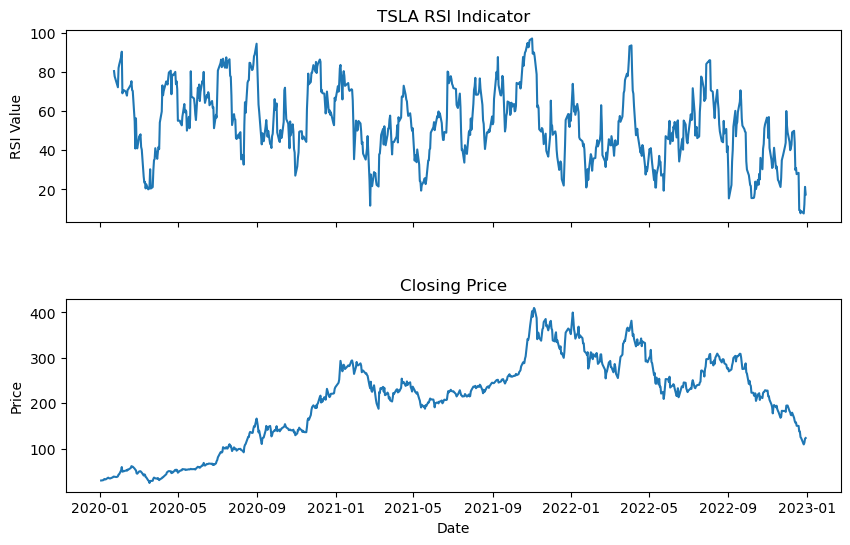

In [245]:
# Calculate RSI indicator
data['RSI'] = calculate_rsi(data)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 6))

# Plot RSI on the first subplot
ax1.plot(data['RSI'])
ax1.set_title('TSLA RSI Indicator')
ax1.set_ylabel('RSI Value')

# Plot closing price on the second subplot
ax2.plot(data['Close'])
ax2.set_title('Closing Price')
ax2.set_xlabel('Date')
ax2.set_ylabel('Price')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


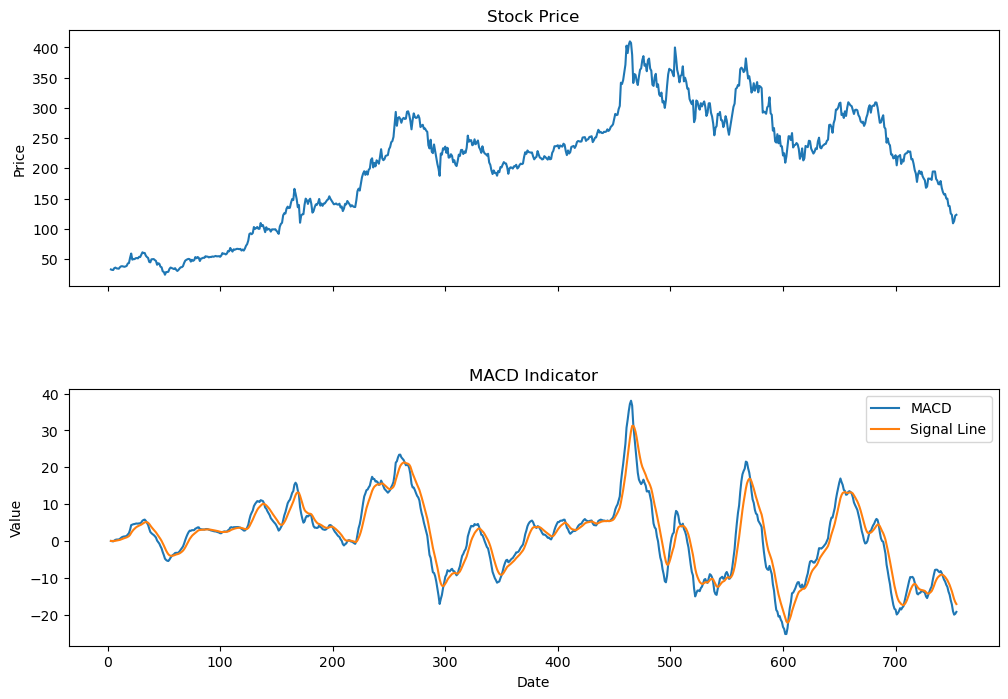

In [562]:
# Define a function to calculate MACD
def calculate_macd(data, fast=12, slow=26, signal=9):
    exp12 = data['Close'].ewm(span=fast, adjust=False).mean()
    exp26 = data['Close'].ewm(span=slow, adjust=False).mean()
    macd = exp12 - exp26
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

# Calculate MACD and signal line
data['MACD'], data['Signal_Line'] = calculate_macd(data)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot stock price on the first subplot
ax1.plot(data['Close'])
ax1.set_title('Stock Price')
ax1.set_ylabel('Price')

# Plot MACD and signal line on the second subplot
ax2.plot(data['MACD'], label='MACD')
ax2.plot(data['Signal_Line'], label='Signal Line')
ax2.set_title('MACD Indicator')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()

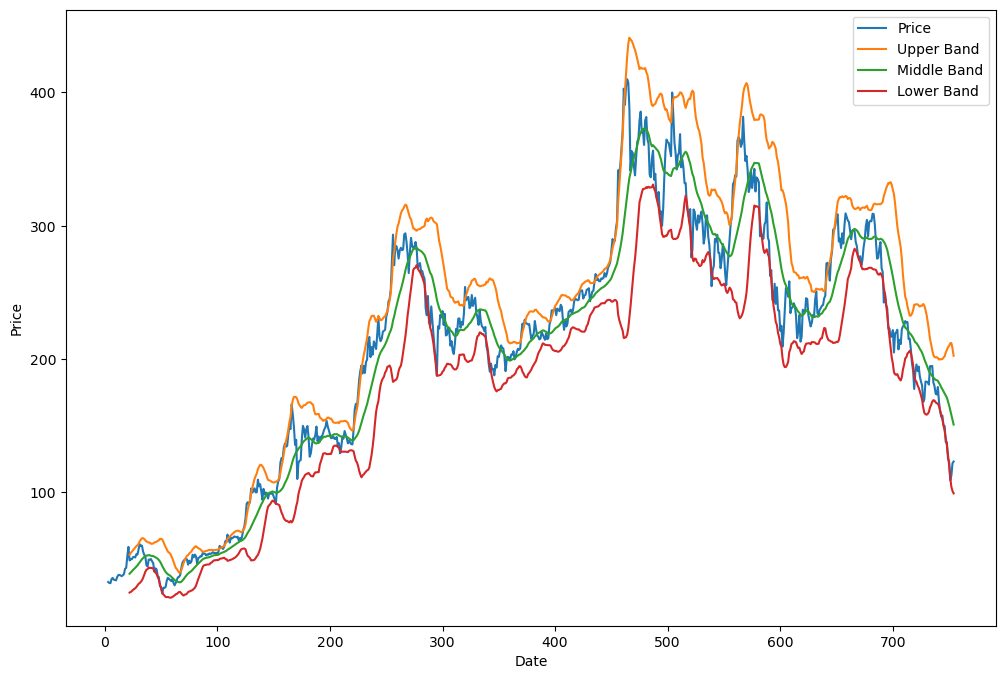

In [566]:
# Calculate Bollinger Bands
data['Upper_Band'], data['Middle_Band'], data['Lower_Band'] = calculate_bollinger_bands(data)

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(12,8))

# Plot the stock price and Bollinger Bands on the same axis
ax.plot(data['Close'], label='Price')
ax.plot(data['Upper_Band'], label='Upper Band')
ax.plot(data['Middle_Band'], label='Middle Band')
ax.plot(data['Lower_Band'], label='Lower Band')

# Set the axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Show the plot
plt.show()


In [248]:
# reorder the columns
data

,Open,High,Low,Close,Adj Close,Volume,OBV,Y_t-1,OBV_t-1,Predicted_Close,Monthly_Return,RSI,MACD,Signal_Line,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,,,,,,,,,
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,409659000,28.684000,1.429815e+08,29.646951,0.033571,NaN,0.000000,0.000000,NaN,NaN,NaN
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,561654000,29.534000,4.096590e+08,30.506364,0.032924,NaN,0.045364,0.009073,NaN,NaN,NaN
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,829885500,30.102667,5.616540e+08,31.079723,0.032457,NaN,0.173562,0.041971,NaN,NaN,NaN
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,1297050000,31.270666,8.298855e+08,32.254687,0.031468,NaN,0.394767,0.112530,NaN,NaN,NaN
2020-01-09 00:00:00-05:00,33.139999,33.253334,31.524668,32.089333,32.089333,426606000,870444000,32.809334,1.297050e+09,33.809447,0.030483,NaN,0.506141,0.191252,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,11075250600,125.349998,1.124224e+10,126.214746,0.006899,8.967613,-17.244768,-13.664886,209.944438,165.201,120.457562
2022-12-27 00:00:00-05:00,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,10866607200,123.150002,1.107525e+10,124.022188,0.007082,7.743781,-19.072995,-14.746507,211.919424,161.510,111.100577
2022-12-28 00:00:00-05:00,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,11087677700,109.099998,1.086661e+10,110.071826,0.008908,12.378847,-20.000032,-15.797212,212.095097,158.104,104.112903


# Feature Importance and Feature Selection

In [307]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns




In [324]:

# Read the feature data from the uploaded file
# Load the data
data = pd.read_csv('Features.csv')
data = data.fillna(data.median())
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.columns

/var/folders/5c/h6wjy_v52h991z819dmfhwnr0000gn/T/ipykernel_26883/1182469978.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.median())


Index(['Date', 'OBV', 'Y_t-1_2', 'OBV_t-1', 'Daily_Return', 'PC1', 'PC2',
       'Mkt-RF', 'SMB', 'HML', 'RF', 'ADS_INDEX_041423', 'Y_t-1_3', 'Y_t-2',
       'Y_t-3', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [325]:
data_tsla = pd.merge(ff_data, data, on='Date')

In [336]:
tesla_pca_df.to_csv('pca-tsla-stock.csv')

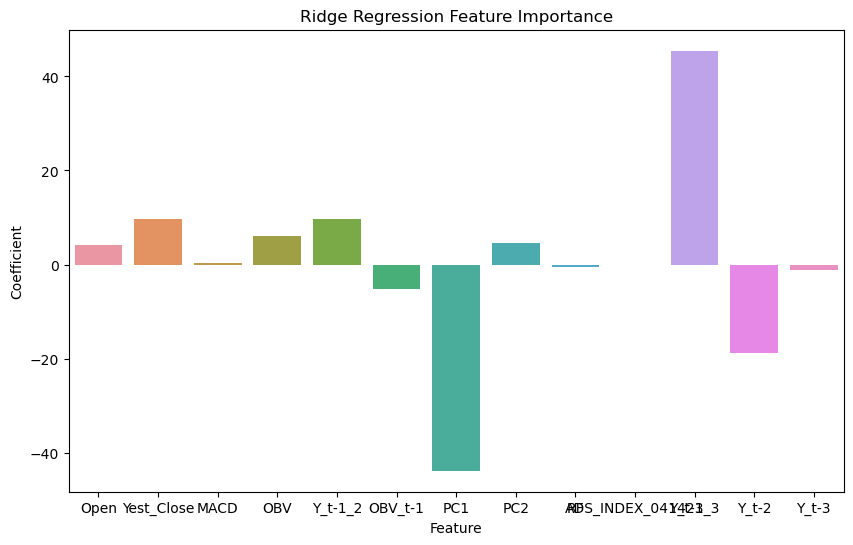

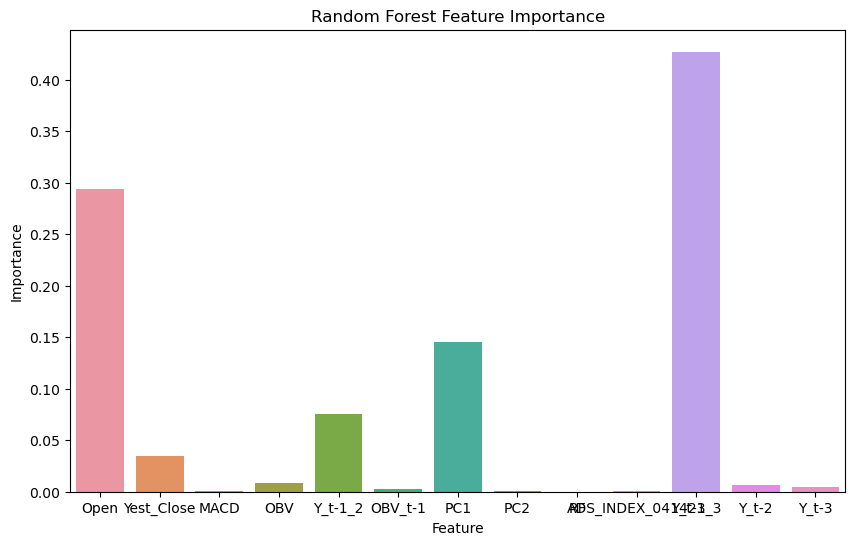

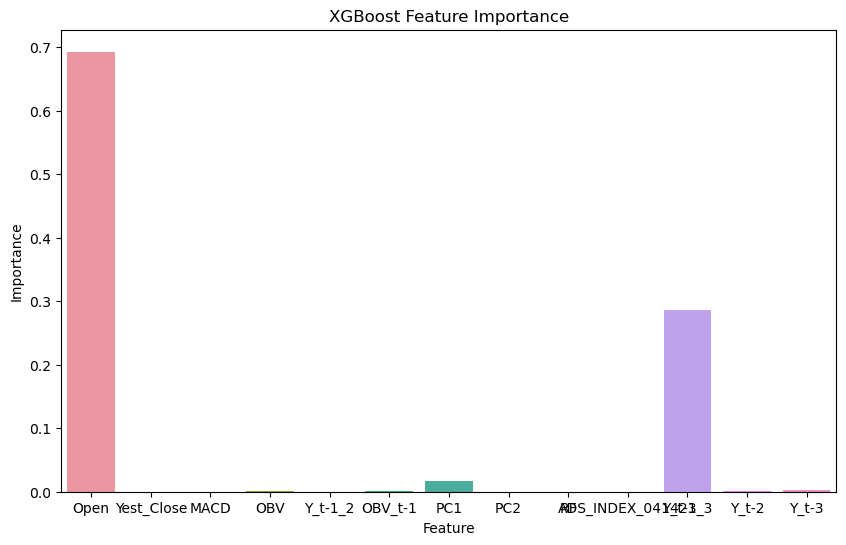

In [344]:
# Select the features and target variable

data['Yest_Close']  = data['Adj Close'].shift(1)

data['SMA10'] = data['Close'].rolling(window=10).mean()
data['SMA10'] = data['SMA10'].fillna(method='bfill')
data['SMA20'] = data['Adj Close'].rolling(window=20).mean()
data['SMA20'] = data['SMA20'].fillna(method='bfill')


# Calculate the relative strength index (RSI)
delta = data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['RSI'] = data['RSI'].fillna(method='bfill')


# Calculate the moving average convergence divergence (MACD)
data['EMA12'] = data['Adj Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']

data = data.dropna()

# 'SMA10','SMA20','RSI','EMA12','EMA26', 'Mkt-RF', 'SMB', 'HML',

X = data[[ 'Open', 'Yest_Close', 'MACD','OBV', 'Y_t-1_2', 'OBV_t-1', 'PC1', 'PC2', 'RF', 'ADS_INDEX_041423', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform Ridge regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
ridge_coef = pd.DataFrame(ridge.coef_, index=X.columns, columns=['Ridge Coefficients'])

# Perform Random Forest feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['RF Importance'])

# Perform XGBoost feature importance
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg.fit(X_train, y_train)
xgb_importance = pd.DataFrame(xgb_reg.feature_importances_, index=X.columns, columns=['XGB Importance'])

# Combine the results into a single DataFrame
result = pd.concat([ridge_coef, rf_importance, xgb_importance], axis=1)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x=result.index, y='Ridge Coefficients')
plt.title('Ridge Regression Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x=result.index, y='RF Importance')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x=result.index, y='XGB Importance')
plt.title('XGBoost Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


[*********************100%***********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 4.804481
         Iterations: 4
         Function evaluations: 65
         Gradient evaluations: 13
RMSE =  11.447638491908481


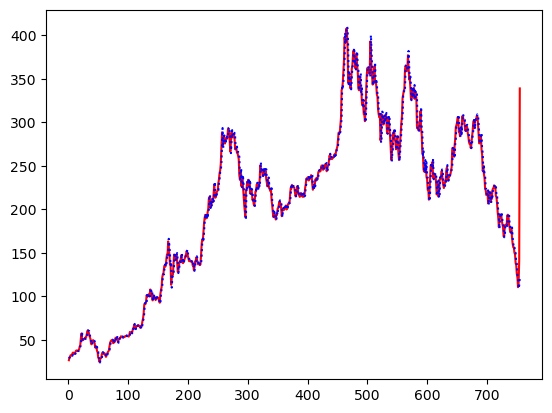

In [525]:

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
 
def Kalman_Filter(param,*args):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = param[0]
 T = param[1]
 H = param[2]
 Q = param[3]
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 KF_Dens = np.zeros(S)
 for s in range(1,S):
  if s == 1: 
    P_update[s] = 1000
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
  else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    KF_Dens[s] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(abs(F[s]))+(1/2)*np.transpose(v[s])*(1/F[s])*v[s]      
    
    Likelihood = sum(KF_Dens[1:-1]) # a loss function
    
    return Likelihood
          
def Kalman_Smoother(params, Y, *args):
 S = Y.shape[0]
 S = S + 1
 "Initialize Params:"
 Z = params[0]
 T = params[1]
 H = params[2]
 Q = params[3]
 
 "Kalman Filter Starts:"
 u_predict = np.zeros(S)
 u_update = np.zeros(S)
 P_predict = np.zeros(S)
 P_update = np.zeros(S)
 v = np.zeros(S)
 F = np.zeros(S)
 for s in range(1,S):
   if s == 1: 
    P_update[s] = 100
    P_predict[s] =  T*P_update[1]*np.transpose(T)+Q    
   else: 
    F[s] = Z*P_predict[s-1]*np.transpose(Z)+H 
    v[s]=Y[s-1]-Z*u_predict[s-1]   
    u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
    u_predict[s] = T*u_update[s]; 
    P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1];
    P_predict[s] = T*P_update[s]*np.transpose(T)+Q
    
    u_smooth = np.zeros(S)
    P_smooth = np.zeros(S)
    u_smooth[S-1] = u_update[S-1]
    P_smooth[S-1] = P_update[S-1]    
 for  t in range(S-1,0,-1):
        u_smooth[t-1] = u_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]-T*u_update[t])
        P_smooth[t-1] = P_update[t] + P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_predict[t])/P_predict[t]*T*P_update[t]
 u_smooth = u_smooth[1:-1]
 return u_smooth

start_date = datetime(2020,1,1)
end_date = datetime(2022,12,31)
TSLA = yf.download('TSLA',start_date ,end_date)
Y = TSLA['Adj Close'].values
#Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.size;
#param0 = np.array([1.5, 1.35, 120*np.std(Y), 200*np.std(Y)])

param0 = np.array([1, 10, np.std(Y), 1500*np.std(Y)])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x,Y)

RMSE = np.sqrt(np.square(np.subtract(u,Y[0:-1])).mean())
print ("RMSE = ", RMSE)
timevec = np.linspace(1,T-1,T-1)
plt.plot(timevec, u,'r',timevec, Y[0:-1],'b:')

[*********************100%***********************]  1 of 1 completed
         Current function value: nan
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1
RMSE =  0.05718760658850746


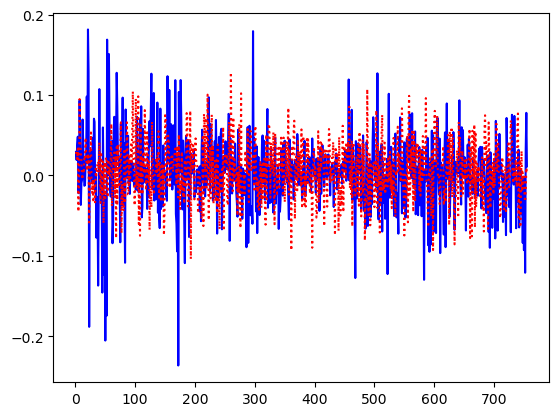

In [528]:
import numpy as np
import pandas as pd
# import pyflux as pf
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

def GARCH(param, *args):
 "Initialize Params:"
 mu = param[0]
 omega = param[1]
 alpha = param[2]
 beta = param[3]
 T = Y.shape[0]
 GARCH_Dens = np.zeros(T) 
 sigma2 = np.zeros(T)       
 F = np.zeros(T)   
 v = np.zeros(T)   
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
    v[t] = sigma2[t]
    GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+\
                    (1/2)*(F[t]/v[t])     
 
 Likelihood = np.sum(GARCH_Dens[1:-1])  
 return Likelihood


def GARCH_PROD(params, Y0, T):
 mu = params[0]
 omega = params[1]
 alpha = params[2]
 beta = params[3]
 Y = np.zeros(T)  
 sigma2 = np.zeros(T)
 Y[0] = Y0
 sigma2[0] = 0.003
 for t in range(1,T):
    sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
    Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
 return Y    

# 1. Simulated Data
# T = 1000
# mu = 35;
# sig = 5;
# Y = np.random.normal(mu,sig,T);
# 2. Real Data
TSLA = yf.download('TSLA', datetime(2020,1,1), datetime(2022,12,31))
# Y = TSLA['Adj Close'].values
Y = np.diff(np.log(TSLA['Adj Close'].values))
T = Y.shape[0]

param0 = np.array([2*np.mean(Y), np.var(Y)/1.4, 0.1, -0.3])
param_star = minimize(GARCH, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
Y_GARCH = GARCH_PROD(param_star.x, Y[0], T)
timevec = np.linspace(1,T,T)
plt.plot(timevec, Y,'b',timevec, Y_GARCH,'r:')


RMSE = np.sqrt(np.square(np.subtract(Y_GARCH,Y)).mean())
print ("RMSE = ", RMSE)

# Ridge Regression

In [459]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# imputer = SimpleImputer()
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

# Create and fit Ridge Regression model
ridge = Ridge()
param_grid = {"alpha": np.logspace(-5, 10, num=16, base=2)}

# Perform grid search using cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Define cross-validation strategy
grid_search = GridSearchCV(ridge, param_grid, scoring="neg_mean_squared_error", cv=cv)
grid_search.fit(X_train, y_train)

# Extract best alpha value and corresponding MSE score
best_alpha = grid_search.best_params_['alpha']

# Train Ridge Regression model with best alpha value
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

y_pred = ridge_best.predict(X_test)

# Calculate Mean Squared Error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mse = mean_squared_error(y_test, y_pred)

print("Best alpha: ", best_alpha)
print('Train RMSE:', rmse_train)
print('Test RMSE:', mse)


Best alpha:  0.03125
Train RMSE: 1.475450401371823e-13
Test RMSE: 89.60802867830192


In [460]:
y_test

642    272.243347
643    268.433319
644    258.859985
645    274.820007
646    280.899994
          ...    
750    123.150002
751    109.099998
752    112.709999
753    121.820000
754    123.180000
Name: Adj Close, Length: 113, dtype: float64

In [461]:
Result = pd.DataFrame({'Actual_Close_Price':y_test,
                                 'Predicted_Close_Price':y_pred
                                    })
Result = Result.reset_index(drop=True)
# Result.head()
Result

,Actual_Close_Price,Predicted_Close_Price
0,272.243347,272.243349
1,268.433319,268.433323
2,258.859985,258.859992
3,274.820007,274.819999
4,280.899994,280.899992
...,...,...
108,123.150002,123.150005
109,109.099998,109.100005
110,112.709999,112.709997
111,121.820000,121.819997


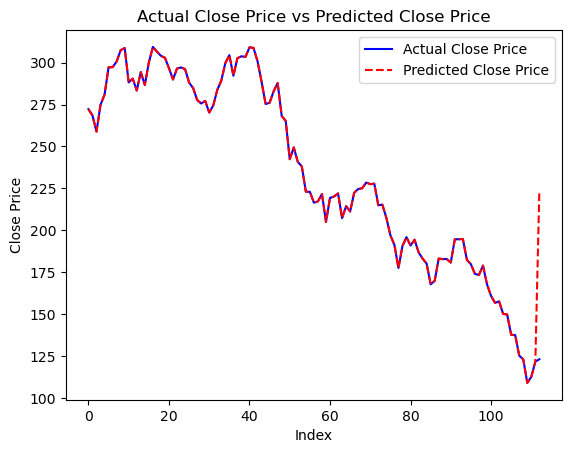

In [462]:
plt.plot(Result['Actual_Close_Price'], label='Actual Close Price', color='blue', linestyle='-')
plt.plot(Result['Predicted_Close_Price'], label='Predicted Close Price', color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.title("Actual Close Price vs Predicted Close Price")
plt.legend()
plt.show()

In [463]:
# Create a DataFrame to store the predicted values
test_start_idx = X_train.shape[0]
test_end_idx = test_start_idx + X_test.shape[0]

val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

In [464]:
def generate_trading_signal(df):
    if df['Predicted Adj Close'] - df['Yest_Close'] > 0.01:
        return 1  # Buy the stock
    elif df['Predicted Adj Close'] - df['Yest_Close'] < -0.01:
        return -1  # Short sell the stock
    else:
        return 0  # Hold the stock

val_data['Yest_Close']  = val_data['Predicted Adj Close'].shift(1)

# Drop the first row, which has NaN values
val_data.dropna(inplace=True)

# Apply the trading signal function to the validation set
val_data['Trading Signal'] = val_data.apply(generate_trading_signal, axis=1)

# Calculate the daily returns from the trading strategy
val_data['Strategy Returns'] = val_data['Trading Signal'] * (val_data['Adj Close'] - val_data['Adj Close'].shift(1))

# Reduce risk by limiting maximum investment to a fraction of the portfolio value
initial_amount = 10000
max_investment = 0.1  # Maximum 10% of portfolio value per trade
total_shares = 0
portfolio_value = initial_amount

# Loop through validation data and execute trades
for i, row in val_data.iterrows():
    # Calculate maximum shares that can be bought based on available investment amount
    max_buy_shares = int(portfolio_value * max_investment / row['Adj Close'])
    if max_buy_shares == 0:
        # If there is not enough money left to buy any shares, skip the trade
        continue
    
    if row['Trading Signal'] == 1:
        # Buy the stock
        investment = max_investment * portfolio_value
        shares_bought = min(max_buy_shares, int(investment / row['Adj Close']))
        total_shares += shares_bought
        portfolio_value -= shares_bought * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    elif row['Trading Signal'] == -1:
        # Sell the stock
        shares_sold = min(total_shares, int(max_buy_shares))
        total_shares -= shares_sold
        portfolio_value += shares_sold * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    else:
        # Hold the stock
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']

# Calculate the cumulative returns from the trading strategy
val_data['Cumulative Returns'] = (1 + val_data['Strategy Returns']).cumprod()

# Calculate the profit or loss from the trading strategy
profit_loss = val_data['Portfolio Value'].iloc[-1] - initial_amount

# Define a function to execute trades
def execute_trades(df):
    if df['Trading Signal'] == 1:
        return 'Buy'
    elif df['Trading Signal'] == -1:
        return 'Short Sell'
    else:
        return 'Hold'

# Apply the execute trades function to the validation set
val_data['Trade'] = val_data.apply(execute_trades, axis=1)

print(val_data)

val_data.dropna()

          Date   Adj Close  Predicted Adj Close  Yest_Close  Trading Signal  \
643 2022-07-25  268.433319           268.433323  272.243349              -1   
644 2022-07-26  258.859985           258.859992  268.433323              -1   
645 2022-07-27  274.820007           274.819999  258.859992               1   
646 2022-07-28  280.899994           280.899992  274.819999               1   
647 2022-07-29  297.149994           297.149980  280.899992               1   
..         ...         ...                  ...         ...             ...   
750 2022-12-23  123.150002           123.150005  125.350006              -1   
751 2022-12-27  109.099998           109.100005  123.150005              -1   
752 2022-12-28  112.709999           112.709997  109.100005               1   
753 2022-12-29  121.820000           121.819997  112.709997               1   
754 2022-12-30  123.180000           223.806574  121.819997               1   

     Strategy Returns  Portfolio Value  Cumulative 

,Date,Adj Close,Predicted Adj Close,Yest_Close,Trading Signal,Strategy Returns,Portfolio Value,Cumulative Returns,Trade
644,2022-07-26,258.859985,258.859992,268.433323,-1,9.573334,10000.000000,1.057333e+01,Short Sell
645,2022-07-27,274.820007,274.819999,258.859992,1,15.960022,10000.000000,1.793240e+02,Buy
646,2022-07-28,280.899994,280.899992,274.819999,1,6.079987,10018.239960,1.269611e+03,Buy
647,2022-07-29,297.149994,297.149980,280.899992,1,16.250000,10115.739960,2.190080e+04,Buy
648,2022-08-01,297.276672,297.276673,297.149980,1,0.126678,10116.753388,2.467516e+04,Buy
...,...,...,...,...,...,...,...,...,...
750,2022-12-23,123.150002,123.150005,125.350006,-1,2.199997,7647.379791,4.274703e+78,Short Sell
751,2022-12-27,109.099998,109.100005,123.150005,-1,14.050003,7647.379791,6.433430e+79,Short Sell
752,2022-12-28,112.709999,112.709997,109.100005,1,3.610001,7647.379791,2.965812e+80,Buy
753,2022-12-29,121.820000,121.819997,112.709997,1,9.110001,7702.039794,2.998436e+81,Buy


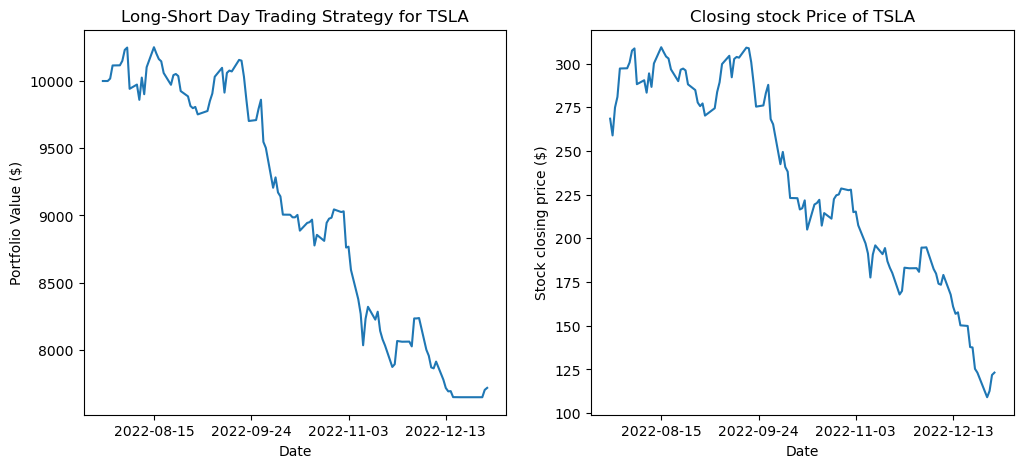

Profit or Loss: $-2283.00
Total Money: $7717.00


In [465]:
# Plot the portfolio value from the trading strategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot portfolio value
axs[0].plot(val_data['Date'], val_data['Portfolio Value'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Portfolio Value ($)')
axs[0].set_title('Long-Short Day Trading Strategy for TSLA')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Plot stock closing price
axs[1].plot(val_data['Date'], val_data['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock closing price ($)')
axs[1].set_title('Closing stock Price of TSLA')
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Show the plot
plt.show()

# Print the profit or loss from the trading strategy
print('Profit or Loss: ${:.2f}'.format(profit_loss))
print('Total Money: ${:.2f}'.format(initial_amount + profit_loss))

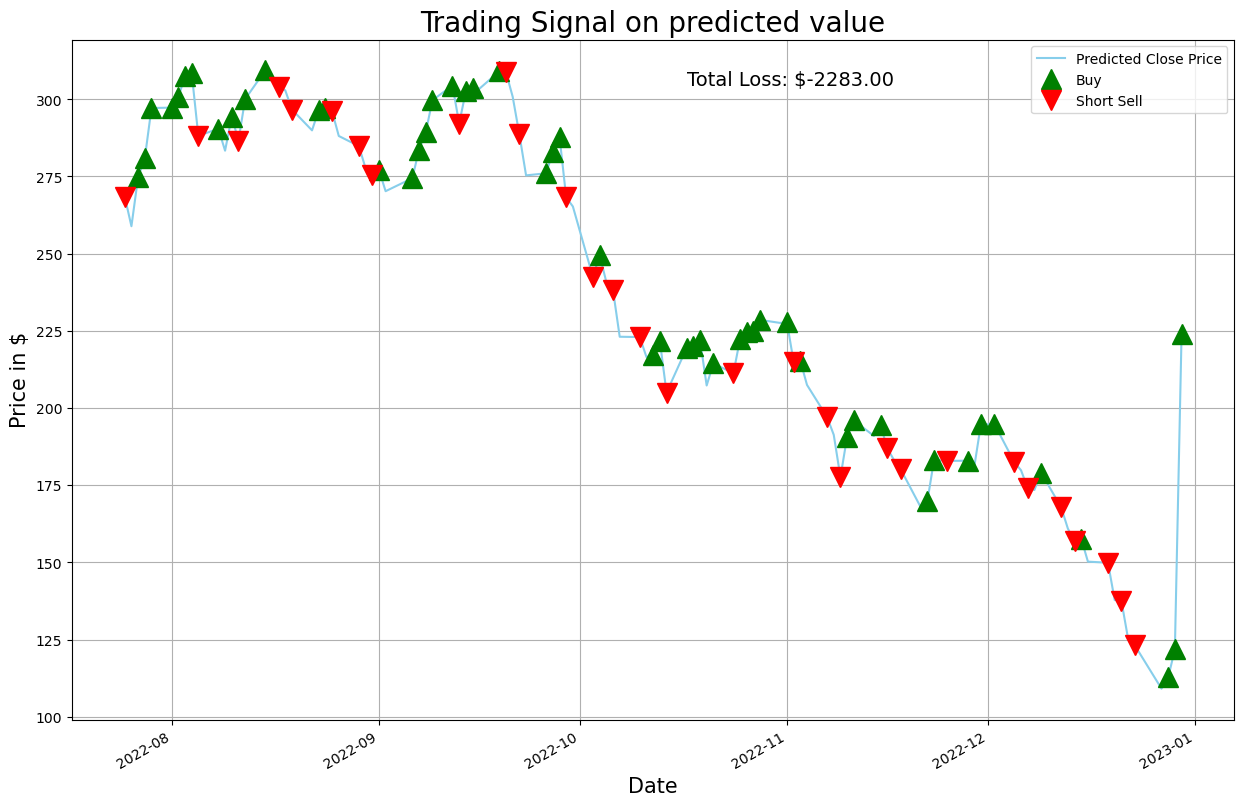

In [466]:
if(val_data.index.name != 'Date'):
    val_data = val_data.set_index('Date')

plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
val_data['Predicted Adj Close'].plot(color = 'skyblue', label= 'Predicted Close Price') 
# plot ‘buy’ signals
plt.plot(val_data[val_data['Trade'] == 'Buy'][::1].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Buy'][::1], 
         '^', markersize = 15, color = 'g', label = 'Buy')
# plot ‘sell’ signals
plt.plot(val_data[val_data['Trade'] == 'Short Sell'][::2].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Short Sell'][::2], 
         'v', markersize = 15, color = 'r', label = 'Short Sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Trading Signal on predicted value', fontsize = 20)
plt.legend()
plt.grid()

if profit_loss > 0:
    pl_text = f"Total Profit: ${profit_loss:.2f}"
    pl_color = 'g'
else:
    pl_text = f"Total Loss: ${profit_loss:.2f}"
    pl_color = 'r'
    
plt.text(val_data.index[-30], val_data['Predicted Adj Close'].max(), pl_text,
         ha='right', va='top', fontsize=14)

plt.show()
# Create a DataFrame to store the predicted values
val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

# LASSO Regression

In [467]:
# ------------------------------------------------------------------------------
# Factor Selection using LASSO
# ------------------------------------------------------------------------------


from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

param_grid = {'alpha': np.logspace(-4, 4, 9)}  # Alpha values from 10^-4 to 10^4

# Create Lasso regression model
model = Lasso(fit_intercept=False)

# Perform grid search with cross-validation to select best alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best alpha and train Lasso model with it
best_alpha = grid_search.best_params_['alpha']
model = Lasso(alpha=best_alpha, fit_intercept=False)
model.fit(X_train, y_train)
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("Best alpha: ", best_alpha)
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Best alpha:  10.0
Train RMSE: 2.9953783103041784
Test RMSE: 4.58387035077755


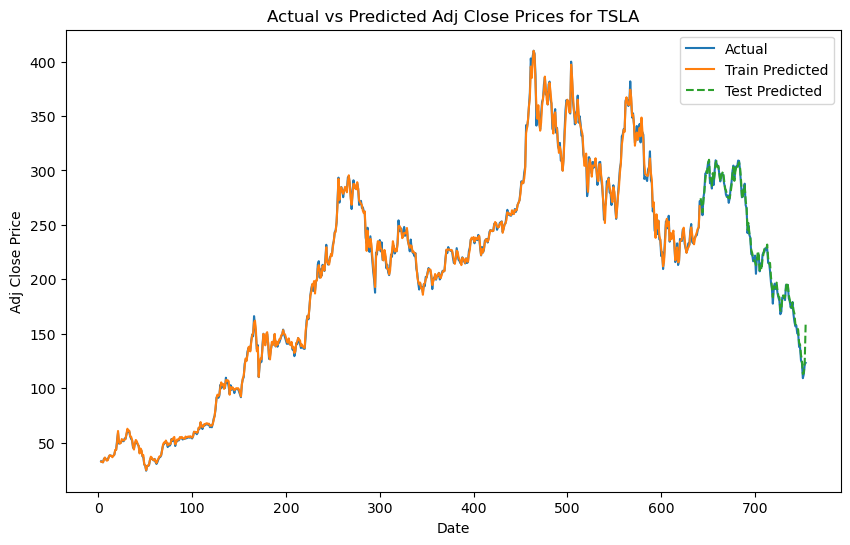

In [468]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted', linestyle='-')
plt.plot(X_test.index, y_pred_test, label='Test Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()

In [469]:
# Create a DataFrame to store the predicted values
test_start_idx = X_train.shape[0]
test_end_idx = test_start_idx + X_test.shape[0]

val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred_test})

In [417]:
def generate_trading_signal(df):
    if df['Predicted Adj Close'] - df['Yest_Close'] > 0.01:
        return 1  # Buy the stock
    elif df['Predicted Adj Close'] - df['Yest_Close'] < -0.01:
        return -1  # Short sell the stock
    else:
        return 0  # Hold the stock

val_data['Yest_Close']  = val_data['Predicted Adj Close'].shift(1)

# Drop the first row, which has NaN values
val_data.dropna(inplace=True)

# Apply the trading signal function to the validation set
val_data['Trading Signal'] = val_data.apply(generate_trading_signal, axis=1)

# Calculate the daily returns from the trading strategy
val_data['Strategy Returns'] = val_data['Trading Signal'] * (val_data['Adj Close'] - val_data['Adj Close'].shift(1))

# Reduce risk by limiting maximum investment to a fraction of the portfolio value
initial_amount = 10000
max_investment = 0.1  # Maximum 10% of portfolio value per trade
total_shares = 0
portfolio_value = initial_amount

# Set initial investment amount and portfolio value
initial_amount = 10000
portfolio_value = initial_amount
total_shares = 0
max_investment = 0.1  # Maximum 10% of portfolio value per trade

# Loop through validation data and execute trades
for i, row in val_data.iterrows():
    # Calculate maximum shares that can be bought based on available investment amount
    max_buy_shares = int(portfolio_value * max_investment / row['Adj Close'])
    if max_buy_shares == 0:
        # If there is not enough money left to buy any shares, skip the trade
        continue
    
    if row['Trading Signal'] == 1:
        # Buy the stock
        investment = max_investment * portfolio_value
        shares_bought = min(max_buy_shares, int(investment / row['Adj Close']))
        total_shares += shares_bought
        portfolio_value -= shares_bought * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    elif row['Trading Signal'] == -1:
        # Sell the stock
        shares_sold = min(total_shares, int(max_buy_shares))
        total_shares -= shares_sold
        portfolio_value += shares_sold * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    else:
        # Hold the stock
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']

# Calculate the cumulative returns from the trading strategy
val_data['Cumulative Returns'] = (1 + val_data['Strategy Returns']).cumprod()

# Calculate the profit or loss from the trading strategy
profit_loss = val_data['Portfolio Value'].iloc[-1] - initial_amount

# Define a function to execute trades
def execute_trades(df):
    if df['Trading Signal'] == 1:
        return 'Buy'
    elif df['Trading Signal'] == -1:
        return 'Short Sell'
    else:
        return 'Hold'

# Apply the execute trades function to the validation set
val_data['Trade'] = val_data.apply(execute_trades, axis=1)

print(val_data)

val_data.dropna()

          Date   Adj Close  Predicted Adj Close  Yest_Close  Trading Signal  \
643 2022-07-25  268.433319           269.871277  274.463757              -1   
644 2022-07-26  258.859985           261.454820  269.871277              -1   
645 2022-07-27  274.820007           271.802079  261.454820               1   
646 2022-07-28  280.899994           281.447544  271.802079               1   
647 2022-07-29  297.149994           291.127014  281.447544               1   
..         ...         ...                  ...         ...             ...   
750 2022-12-23  123.150002           126.148377  130.552233              -1   
751 2022-12-27  109.099998           112.947104  126.148377              -1   
752 2022-12-28  112.709999           113.932188  112.947104               1   
753 2022-12-29  121.820000           124.370363  113.932188               1   
754 2022-12-30  123.180000           159.996697  124.370363               1   

     Strategy Returns  Portfolio Value  Cumulative 

,Date,Adj Close,Predicted Adj Close,Yest_Close,Trading Signal,Strategy Returns,Portfolio Value,Cumulative Returns,Trade
644,2022-07-26,258.859985,261.454820,269.871277,-1,9.573334,10000.000000,1.057333e+01,Short Sell
645,2022-07-27,274.820007,271.802079,261.454820,1,15.960022,10000.000000,1.793240e+02,Buy
646,2022-07-28,280.899994,281.447544,271.802079,1,6.079987,10018.239960,1.269611e+03,Buy
647,2022-07-29,297.149994,291.127014,281.447544,1,16.250000,10115.739960,2.190080e+04,Buy
648,2022-08-01,297.276672,299.179759,291.127014,1,0.126678,10116.753388,2.467516e+04,Buy
...,...,...,...,...,...,...,...,...,...
750,2022-12-23,123.150002,126.148377,130.552233,-1,2.199997,8616.649919,-1.143169e+68,Short Sell
751,2022-12-27,109.099998,112.947104,126.148377,-1,14.050003,8616.649919,-1.720470e+69,Short Sell
752,2022-12-28,112.709999,113.932188,112.947104,1,3.610001,8616.649919,-7.931369e+69,Buy
753,2022-12-29,121.820000,124.370363,113.932188,1,9.110001,8680.419923,-8.018615e+70,Buy


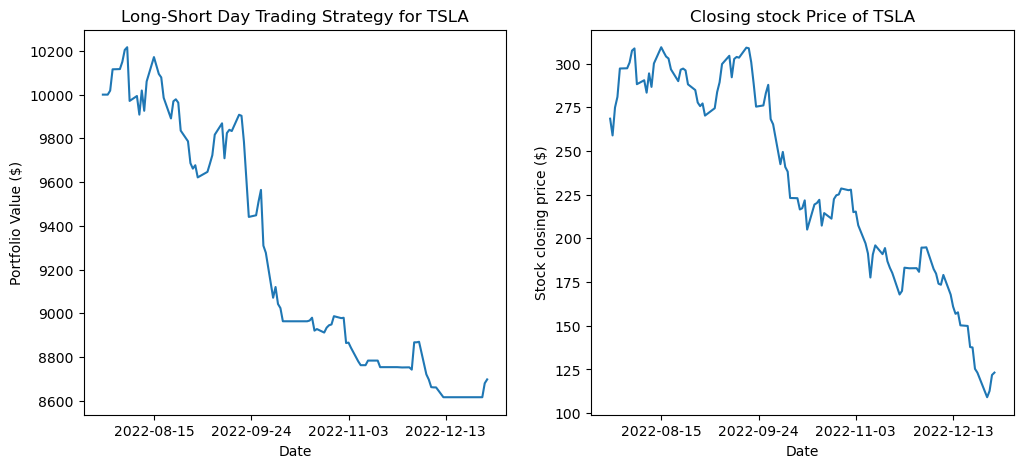

Profit or Loss: $-1301.90
Total Money: $8698.10


In [418]:
# Plot the portfolio value from the trading strategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot portfolio value
axs[0].plot(val_data['Date'], val_data['Portfolio Value'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Portfolio Value ($)')
axs[0].set_title('Long-Short Day Trading Strategy for TSLA')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Plot stock closing price
axs[1].plot(val_data['Date'], val_data['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock closing price ($)')
axs[1].set_title('Closing stock Price of TSLA')
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Show the plot
plt.show()

# Print the profit or loss from the trading strategy
print('Profit or Loss: ${:.2f}'.format(profit_loss))
print('Total Money: ${:.2f}'.format(initial_amount + profit_loss))

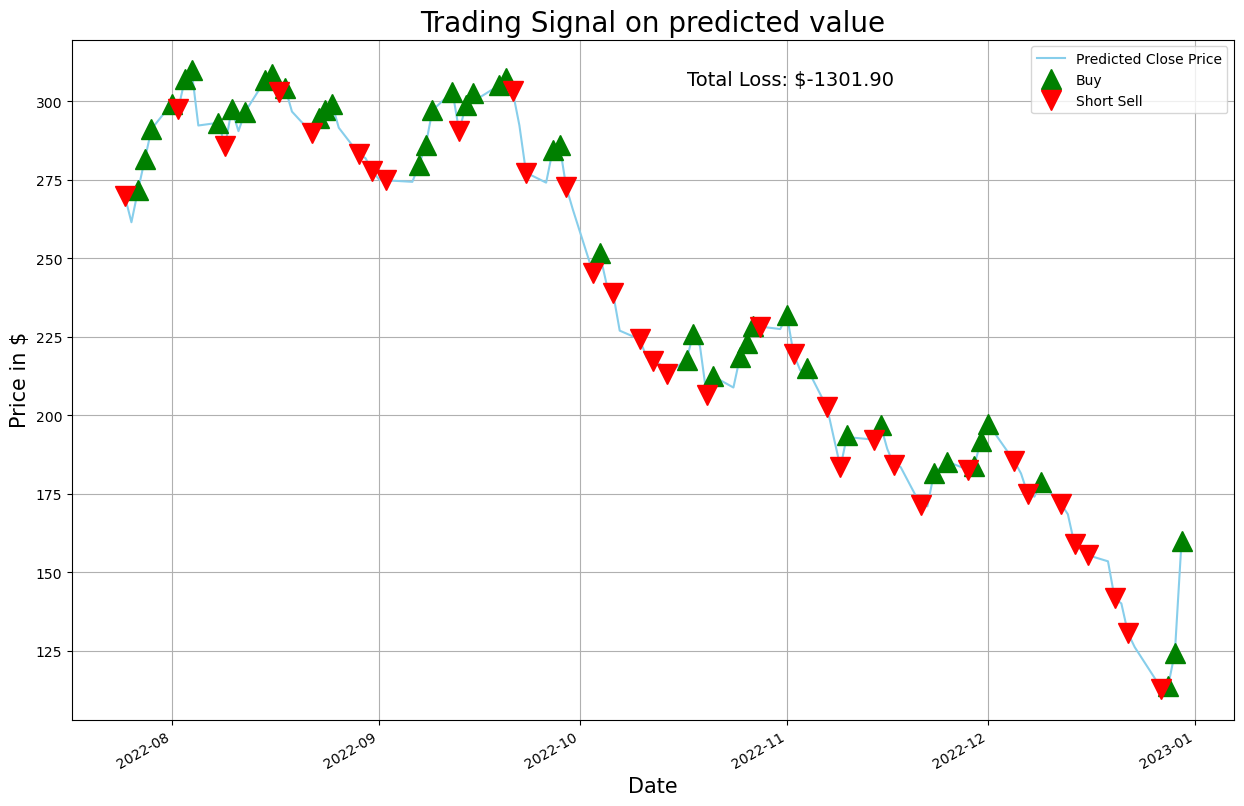

In [419]:
if(val_data.index.name != 'Date'):
    val_data = val_data.set_index('Date')

plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
val_data['Predicted Adj Close'].plot(color = 'skyblue', label= 'Predicted Close Price') 
# plot ‘buy’ signals
plt.plot(val_data[val_data['Trade'] == 'Buy'][::1].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Buy'][::1], 
         '^', markersize = 15, color = 'g', label = 'Buy')
# plot ‘sell’ signals
plt.plot(val_data[val_data['Trade'] == 'Short Sell'][::2].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Short Sell'][::2], 
         'v', markersize = 15, color = 'r', label = 'Short Sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Trading Signal on predicted value', fontsize = 20)
plt.legend()
plt.grid()

if profit_loss > 0:
    pl_text = f"Total Profit: ${profit_loss:.2f}"
    pl_color = 'g'
else:
    pl_text = f"Total Loss: ${profit_loss:.2f}"
    pl_color = 'r'
    
plt.text(val_data.index[-30], val_data['Predicted Adj Close'].max(), pl_text,
         ha='right', va='top', fontsize=14)

plt.show()
# Create a DataFrame to store the predicted values
val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

# Elastic Net

In [470]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Set up hyperparameter grid for alpha values to tune
param_grid = {'alpha': np.logspace(-4, 4, 9)}  # Alpha values from 10^-4 to 10^4

# Create Elastic Net regression model
model = ElasticNet(fit_intercept=False)

# Perform grid search with cross-validation to select best alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best alpha and train Elastic Net model with it
best_alpha = grid_search.best_params_['alpha']
model = ElasticNet(alpha=best_alpha, fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Best alpha:', best_alpha)
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Best alpha: 10.0
Train RMSE: 3.287100603817179
Test RMSE: 3.689550599736976


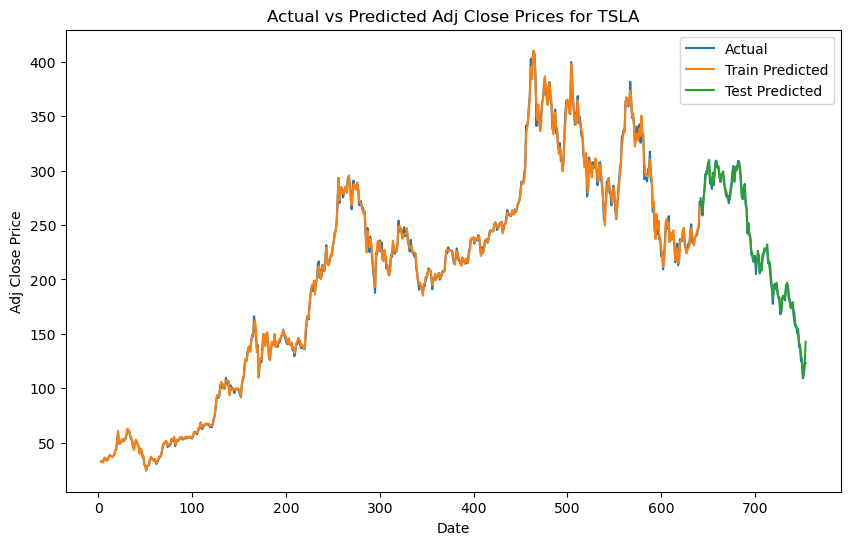

In [471]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()

In [472]:
# Create a DataFrame to store the predicted values
test_start_idx = X_train.shape[0]
test_end_idx = test_start_idx + X_test.shape[0]

val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred_test})

In [473]:
def generate_trading_signal(df):
    if df['Predicted Adj Close'] - df['Yest_Close'] > 0.01:
        return 1  # Buy the stock
    elif df['Predicted Adj Close'] - df['Yest_Close'] < -0.01:
        return -1  # Short sell the stock
    else:
        return 0  # Hold the stock

val_data['Yest_Close']  = val_data['Predicted Adj Close'].shift(1)

# Drop the first row, which has NaN values
val_data.dropna(inplace=True)

# Apply the trading signal function to the validation set
val_data['Trading Signal'] = val_data.apply(generate_trading_signal, axis=1)

# Calculate the daily returns from the trading strategy
val_data['Strategy Returns'] = val_data['Trading Signal'] * (val_data['Adj Close'] - val_data['Adj Close'].shift(1))

# Reduce risk by limiting maximum investment to a fraction of the portfolio value
initial_amount = 10000
max_investment = 0.1  # Maximum 10% of portfolio value per trade
total_shares = 0
portfolio_value = initial_amount

# Set initial investment amount and portfolio value
initial_amount = 10000
portfolio_value = initial_amount
total_shares = 0
max_investment = 0.1  # Maximum 10% of portfolio value per trade

# Loop through validation data and execute trades
for i, row in val_data.iterrows():
    # Calculate maximum shares that can be bought based on available investment amount
    max_buy_shares = int(portfolio_value * max_investment / row['Adj Close'])
    if max_buy_shares == 0:
        # If there is not enough money left to buy any shares, skip the trade
        continue
    
    if row['Trading Signal'] == 1:
        # Buy the stock
        investment = max_investment * portfolio_value
        shares_bought = min(max_buy_shares, int(investment / row['Adj Close']))
        total_shares += shares_bought
        portfolio_value -= shares_bought * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    elif row['Trading Signal'] == -1:
        # Sell the stock
        shares_sold = min(total_shares, int(max_buy_shares))
        total_shares -= shares_sold
        portfolio_value += shares_sold * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    else:
        # Hold the stock
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']

# Calculate the cumulative returns from the trading strategy
val_data['Cumulative Returns'] = (1 + val_data['Strategy Returns']).cumprod()

# Calculate the profit or loss from the trading strategy
profit_loss = val_data['Portfolio Value'].iloc[-1] - initial_amount

# Define a function to execute trades
def execute_trades(df):
    if df['Trading Signal'] == 1:
        return 'Buy'
    elif df['Trading Signal'] == -1:
        return 'Short Sell'
    else:
        return 'Hold'

# Apply the execute trades function to the validation set
val_data['Trade'] = val_data.apply(execute_trades, axis=1)

print(val_data)

val_data.dropna()

          Date   Adj Close  Predicted Adj Close  Yest_Close  Trading Signal  \
643 2022-07-25  268.433319           269.905013  274.714267              -1   
644 2022-07-26  258.859985           261.509609  269.905013              -1   
645 2022-07-27  274.820007           271.607040  261.509609               1   
646 2022-07-28  280.899994           281.593980  271.607040               1   
647 2022-07-29  297.149994           290.560223  281.593980               1   
..         ...         ...                  ...         ...             ...   
750 2022-12-23  123.150002           126.000914  130.517348              -1   
751 2022-12-27  109.099998           112.643616  126.000914              -1   
752 2022-12-28  112.709999           113.599541  112.643616               1   
753 2022-12-29  121.820000           124.365791  113.599541               1   
754 2022-12-30  123.180000           142.673908  124.365791               1   

     Strategy Returns  Portfolio Value  Cumulative 

,Date,Adj Close,Predicted Adj Close,Yest_Close,Trading Signal,Strategy Returns,Portfolio Value,Cumulative Returns,Trade
644,2022-07-26,258.859985,261.509609,269.905013,-1,9.573334,10000.000000,1.057333e+01,Short Sell
645,2022-07-27,274.820007,271.607040,261.509609,1,15.960022,10000.000000,1.793240e+02,Buy
646,2022-07-28,280.899994,281.593980,271.607040,1,6.079987,10018.239960,1.269611e+03,Buy
647,2022-07-29,297.149994,290.560223,281.593980,1,16.250000,10115.739960,2.190080e+04,Buy
648,2022-08-01,297.276672,299.447846,290.560223,1,0.126678,10116.753388,2.467516e+04,Buy
...,...,...,...,...,...,...,...,...,...
750,2022-12-23,123.150002,126.000914,130.517348,-1,2.199997,8519.469987,8.555801e+67,Short Sell
751,2022-12-27,109.099998,112.643616,126.000914,-1,14.050003,8519.469987,1.287648e+69,Short Sell
752,2022-12-28,112.709999,113.599541,112.643616,1,3.610001,8519.469987,5.936059e+69,Buy
753,2022-12-29,121.820000,124.365791,113.599541,1,9.110001,8583.239991,6.001356e+70,Buy


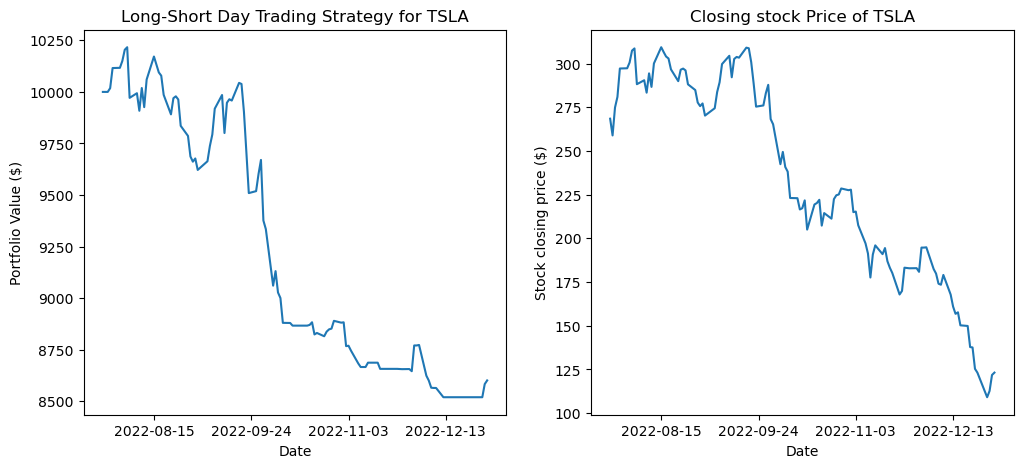

Profit or Loss: $-1399.08
Total Money: $8600.92


In [474]:
# Plot the portfolio value from the trading strategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot portfolio value
axs[0].plot(val_data['Date'], val_data['Portfolio Value'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Portfolio Value ($)')
axs[0].set_title('Long-Short Day Trading Strategy for TSLA')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Plot stock closing price
axs[1].plot(val_data['Date'], val_data['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock closing price ($)')
axs[1].set_title('Closing stock Price of TSLA')
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Show the plot
plt.show()

# Print the profit or loss from the trading strategy
print('Profit or Loss: ${:.2f}'.format(profit_loss))
print('Total Money: ${:.2f}'.format(initial_amount + profit_loss))

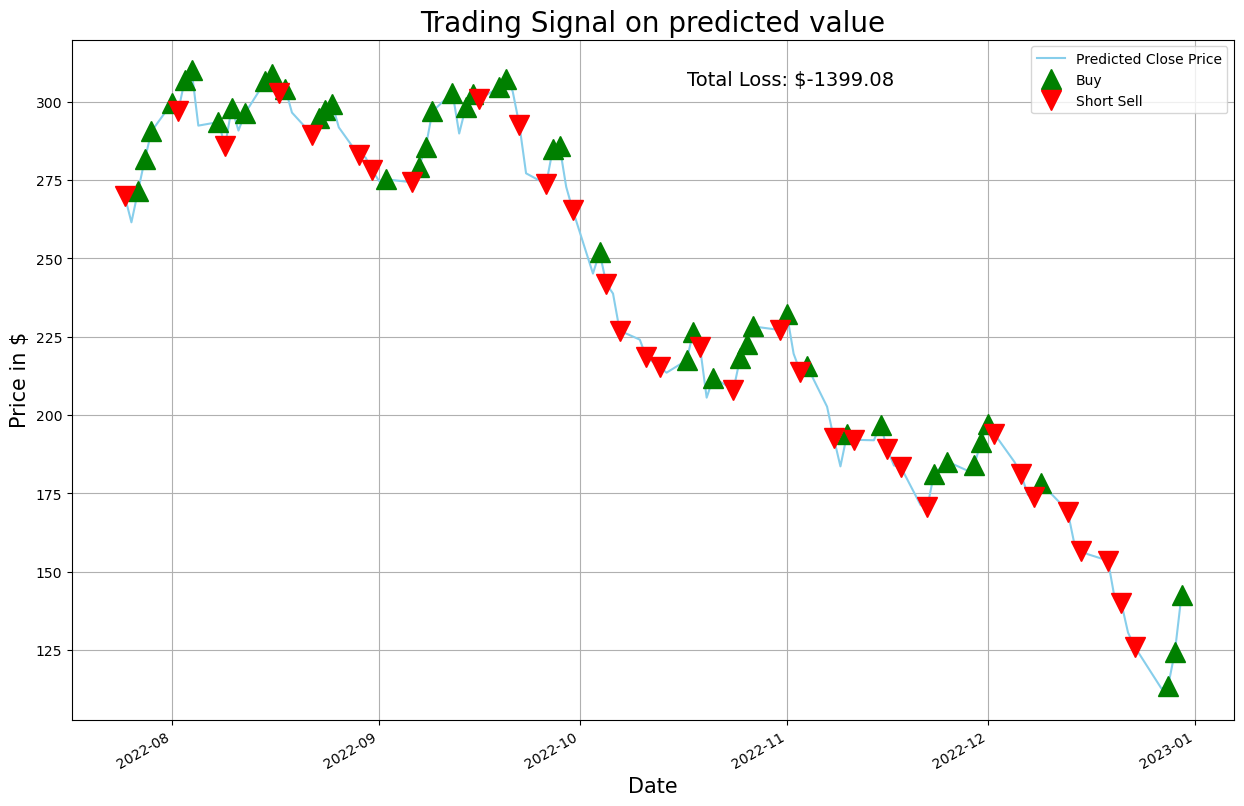

In [475]:
if(val_data.index.name != 'Date'):
    val_data = val_data.set_index('Date')

plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
val_data['Predicted Adj Close'].plot(color = 'skyblue', label= 'Predicted Close Price') 
# plot ‘buy’ signals
plt.plot(val_data[val_data['Trade'] == 'Buy'][::1].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Buy'][::1], 
         '^', markersize = 15, color = 'g', label = 'Buy')
# plot ‘sell’ signals
plt.plot(val_data[val_data['Trade'] == 'Short Sell'][::2].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Short Sell'][::2], 
         'v', markersize = 15, color = 'r', label = 'Short Sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Trading Signal on predicted value', fontsize = 20)
plt.legend()
plt.grid()

if profit_loss > 0:
    pl_text = f"Total Profit: ${profit_loss:.2f}"
    pl_color = 'g'
else:
    pl_text = f"Total Loss: ${profit_loss:.2f}"
    pl_color = 'r'
    
plt.text(val_data.index[-30], val_data['Predicted Adj Close'].max(), pl_text,
         ha='right', va='top', fontsize=14)

plt.show()
# Create a DataFrame to store the predicted values
val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

# Least Angle Regression (LARS)

In [482]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Create LARS regression model
model = Lars(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


Train RMSE: 4.8469332949274394e-11
Test RMSE: 9.466160198808545


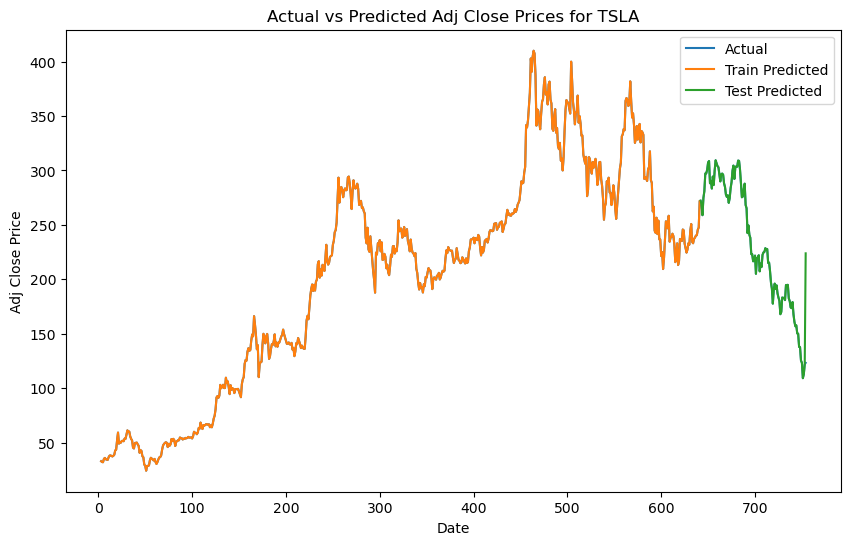

In [483]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()

In [484]:
# Create a DataFrame to store the predicted values
test_start_idx = X_train.shape[0]
test_end_idx = test_start_idx + X_test.shape[0]

val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred_test})

In [485]:
def generate_trading_signal(df):
    if df['Predicted Adj Close'] - df['Yest_Close'] > 0.01:
        return 1  # Buy the stock
    elif df['Predicted Adj Close'] - df['Yest_Close'] < -0.01:
        return -1  # Short sell the stock
    else:
        return 0  # Hold the stock

val_data['Yest_Close']  = val_data['Predicted Adj Close'].shift(1)

# Drop the first row, which has NaN values
val_data.dropna(inplace=True)

# Apply the trading signal function to the validation set
val_data['Trading Signal'] = val_data.apply(generate_trading_signal, axis=1)

# Calculate the daily returns from the trading strategy
val_data['Strategy Returns'] = val_data['Trading Signal'] * (val_data['Adj Close'] - val_data['Adj Close'].shift(1))

# Reduce risk by limiting maximum investment to a fraction of the portfolio value
initial_amount = 10000
max_investment = 0.1  # Maximum 10% of portfolio value per trade
total_shares = 0
portfolio_value = initial_amount

# Loop through validation data and execute trades
for i, row in val_data.iterrows():
    # Calculate maximum shares that can be bought based on available investment amount
    max_buy_shares = int(portfolio_value * max_investment / row['Adj Close'])
    if max_buy_shares == 0:
        # If there is not enough money left to buy any shares, skip the trade
        continue
    
    if row['Trading Signal'] == 1:
        # Buy the stock
        investment = max_investment * portfolio_value
        shares_bought = min(max_buy_shares, int(investment / row['Adj Close']))
        total_shares += shares_bought
        portfolio_value -= shares_bought * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    elif row['Trading Signal'] == -1:
        # Sell the stock
        shares_sold = min(total_shares, int(max_buy_shares))
        total_shares -= shares_sold
        portfolio_value += shares_sold * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    else:
        # Hold the stock
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']

# Calculate the cumulative returns from the trading strategy
val_data['Cumulative Returns'] = (1 + val_data['Strategy Returns']).cumprod()

# Calculate the profit or loss from the trading strategy
profit_loss = val_data['Portfolio Value'].iloc[-1] - initial_amount

# Define a function to execute trades
def execute_trades(df):
    if df['Trading Signal'] == 1:
        return 'Buy'
    elif df['Trading Signal'] == -1:
        return 'Short Sell'
    else:
        return 'Hold'

# Apply the execute trades function to the validation set
val_data['Trade'] = val_data.apply(execute_trades, axis=1)

print(val_data)

val_data.dropna()

          Date   Adj Close  Predicted Adj Close  Yest_Close  Trading Signal  \
643 2022-07-25  268.433319           268.433319  272.243347              -1   
644 2022-07-26  258.859985           258.859985  268.433319              -1   
645 2022-07-27  274.820007           274.820007  258.859985               1   
646 2022-07-28  280.899994           280.899994  274.820007               1   
647 2022-07-29  297.149994           297.149994  280.899994               1   
..         ...         ...                  ...         ...             ...   
750 2022-12-23  123.150002           123.150002  125.349999              -1   
751 2022-12-27  109.099998           109.099999  123.150002              -1   
752 2022-12-28  112.709999           112.709999  109.099999               1   
753 2022-12-29  121.820000           121.820000  112.709999               1   
754 2022-12-30  123.180000           223.806664  121.820000               1   

     Strategy Returns  Portfolio Value  Cumulative 

,Date,Adj Close,Predicted Adj Close,Yest_Close,Trading Signal,Strategy Returns,Portfolio Value,Cumulative Returns,Trade
644,2022-07-26,258.859985,258.859985,268.433319,-1,9.573334,10000.000000,1.057333e+01,Short Sell
645,2022-07-27,274.820007,274.820007,258.859985,1,15.960022,10000.000000,1.793240e+02,Buy
646,2022-07-28,280.899994,280.899994,274.820007,1,6.079987,10018.239960,1.269611e+03,Buy
647,2022-07-29,297.149994,297.149994,280.899994,1,16.250000,10115.739960,2.190080e+04,Buy
648,2022-08-01,297.276672,297.276672,297.149994,1,0.126678,10116.753388,2.467516e+04,Buy
...,...,...,...,...,...,...,...,...,...
750,2022-12-23,123.150002,123.150002,125.349999,-1,2.199997,7647.379791,4.274703e+78,Short Sell
751,2022-12-27,109.099998,109.099999,123.150002,-1,14.050003,7647.379791,6.433430e+79,Short Sell
752,2022-12-28,112.709999,112.709999,109.099999,1,3.610001,7647.379791,2.965812e+80,Buy
753,2022-12-29,121.820000,121.820000,112.709999,1,9.110001,7702.039794,2.998436e+81,Buy


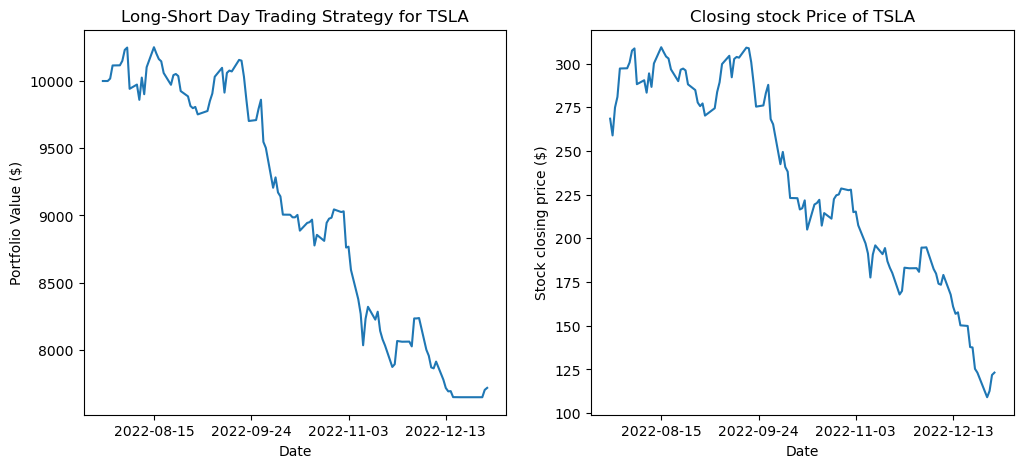

Profit or Loss: $-2283.00
Total Money: $7717.00


In [486]:
# Plot the portfolio value from the trading strategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot portfolio value
axs[0].plot(val_data['Date'], val_data['Portfolio Value'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Portfolio Value ($)')
axs[0].set_title('Long-Short Day Trading Strategy for TSLA')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Plot stock closing price
axs[1].plot(val_data['Date'], val_data['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock closing price ($)')
axs[1].set_title('Closing stock Price of TSLA')
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Show the plot
plt.show()

# Print the profit or loss from the trading strategy
print('Profit or Loss: ${:.2f}'.format(profit_loss))
print('Total Money: ${:.2f}'.format(initial_amount + profit_loss))

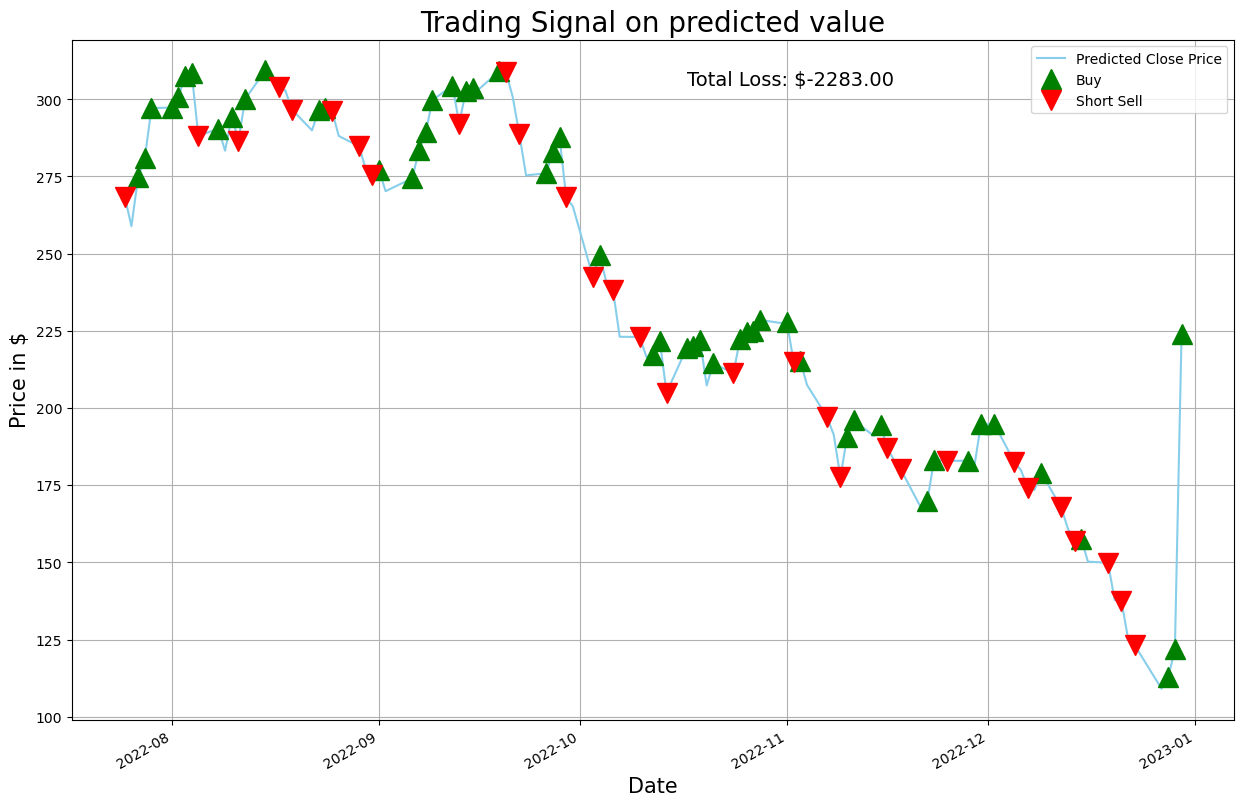

In [487]:
if(val_data.index.name != 'Date'):
    val_data = val_data.set_index('Date')

plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
val_data['Predicted Adj Close'].plot(color = 'skyblue', label= 'Predicted Close Price') 
# plot ‘buy’ signals
plt.plot(val_data[val_data['Trade'] == 'Buy'][::1].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Buy'][::1], 
         '^', markersize = 15, color = 'g', label = 'Buy')
# plot ‘sell’ signals
plt.plot(val_data[val_data['Trade'] == 'Short Sell'][::2].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Short Sell'][::2], 
         'v', markersize = 15, color = 'r', label = 'Short Sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Trading Signal on predicted value', fontsize = 20)
plt.legend()
plt.grid()

if profit_loss > 0:
    pl_text = f"Total Profit: ${profit_loss:.2f}"
    pl_color = 'g'
else:
    pl_text = f"Total Loss: ${profit_loss:.2f}"
    pl_color = 'r'
    
plt.text(val_data.index[-30], val_data['Predicted Adj Close'].max(), pl_text,
         ha='right', va='top', fontsize=14)

plt.show()
# Create a DataFrame to store the predicted values
val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

# XGBoost

In [555]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Create XGBoost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


Train RMSE: 0.12489487167551203
Test RMSE: 8.894788822456055


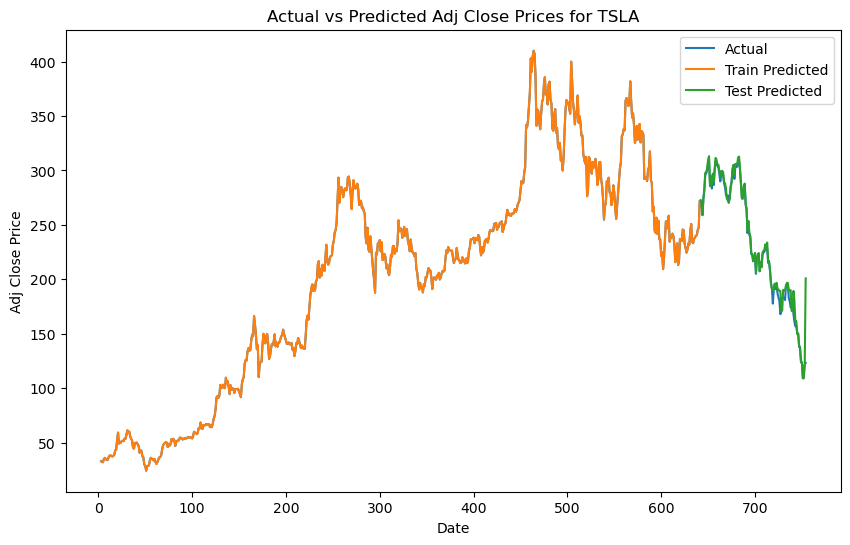

In [556]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()


In [557]:
# Create a DataFrame to store the predicted values
test_start_idx = X_train.shape[0]
test_end_idx = test_start_idx + X_test.shape[0]

val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred_test})

In [558]:
def generate_trading_signal(df):
    if df['Predicted Adj Close'] - df['Yest_Close'] > 0.01:
        return 1  # Buy the stock
    elif df['Predicted Adj Close'] - df['Yest_Close'] < -0.01:
        return -1  # Short sell the stock
    else:
        return 0  # Hold the stock

val_data['Yest_Close']  = val_data['Predicted Adj Close'].shift(1)

# Drop the first row, which has NaN values
val_data.dropna(inplace=True)

# Apply the trading signal function to the validation set
val_data['Trading Signal'] = val_data.apply(generate_trading_signal, axis=1)

# Calculate the daily returns from the trading strategy
val_data['Strategy Returns'] = val_data['Trading Signal'] * (val_data['Adj Close'] - val_data['Adj Close'].shift(1))

# Reduce risk by limiting maximum investment to a fraction of the portfolio value
initial_amount = 10000
max_investment = 0.1  # Maximum 10% of portfolio value per trade
total_shares = 0
portfolio_value = initial_amount

# Set initial investment amount and portfolio value
initial_amount = 10000
portfolio_value = initial_amount
total_shares = 0
max_investment = 0.1  # Maximum 10% of portfolio value per trade

# Loop through validation data and execute trades
for i, row in val_data.iterrows():
    # Calculate maximum shares that can be bought based on available investment amount
    max_buy_shares = int(portfolio_value * max_investment / row['Adj Close'])
    if max_buy_shares == 0:
        # If there is not enough money left to buy any shares, skip the trade
        continue
    
    if row['Trading Signal'] == 1:
        # Buy the stock
        investment = max_investment * portfolio_value
        shares_bought = min(max_buy_shares, int(investment / row['Adj Close']))
        total_shares += shares_bought
        portfolio_value -= shares_bought * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    elif row['Trading Signal'] == -1:
        # Sell the stock
        shares_sold = min(total_shares, int(max_buy_shares))
        total_shares -= shares_sold
        portfolio_value += shares_sold * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    else:
        # Hold the stock
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']

# Calculate the cumulative returns from the trading strategy
val_data['Cumulative Returns'] = (1 + val_data['Strategy Returns']).cumprod()

# Calculate the profit or loss from the trading strategy
profit_loss = val_data['Portfolio Value'].iloc[-1] - initial_amount

# Define a function to execute trades
def execute_trades(df):
    if df['Trading Signal'] == 1:
        return 'Buy'
    elif df['Trading Signal'] == -1:
        return 'Short Sell'
    else:
        return 'Hold'

# Apply the execute trades function to the validation set
val_data['Trade'] = val_data.apply(execute_trades, axis=1)

print(val_data)

val_data.dropna()

          Date   Adj Close  Predicted Adj Close  Yest_Close  Trading Signal  \
643 2022-07-25  268.433319           270.203186  272.688416              -1   
644 2022-07-26  258.859985           258.990479  270.203186              -1   
645 2022-07-27  274.820007           273.935913  258.990479               1   
646 2022-07-28  280.899994           283.783539  273.935913               1   
647 2022-07-29  297.149994           297.643799  283.783539               1   
..         ...         ...                  ...         ...             ...   
750 2022-12-23  123.150002           123.497025  123.451965               1   
751 2022-12-27  109.099998           109.072502  123.497025              -1   
752 2022-12-28  112.709999           108.842667  109.072502              -1   
753 2022-12-29  121.820000           122.728668  108.842667               1   
754 2022-12-30  123.180000           200.831787  122.728668               1   

     Strategy Returns  Portfolio Value  Cumulative 

,Date,Adj Close,Predicted Adj Close,Yest_Close,Trading Signal,Strategy Returns,Portfolio Value,Cumulative Returns,Trade
644,2022-07-26,258.859985,258.990479,270.203186,-1,9.573334,10000.000000,1.057333e+01,Short Sell
645,2022-07-27,274.820007,273.935913,258.990479,1,15.960022,10000.000000,1.793240e+02,Buy
646,2022-07-28,280.899994,283.783539,273.935913,1,6.079987,10018.239960,1.269611e+03,Buy
647,2022-07-29,297.149994,297.643799,283.783539,1,16.250000,10115.739960,2.190080e+04,Buy
648,2022-08-01,297.276672,298.666107,297.643799,1,0.126678,10116.753388,2.467516e+04,Buy
...,...,...,...,...,...,...,...,...,...
750,2022-12-23,123.150002,123.497025,123.451965,1,-2.199997,7650.756563,2.170315e+70,Buy
751,2022-12-27,109.099998,109.072502,123.497025,-1,14.050003,7566.456545,3.266324e+71,Short Sell
752,2022-12-28,112.709999,108.842667,109.072502,-1,-3.610001,7566.456545,-8.525108e+71,Short Sell
753,2022-12-29,121.820000,122.728668,108.842667,1,9.110001,7566.456545,-8.618885e+72,Buy


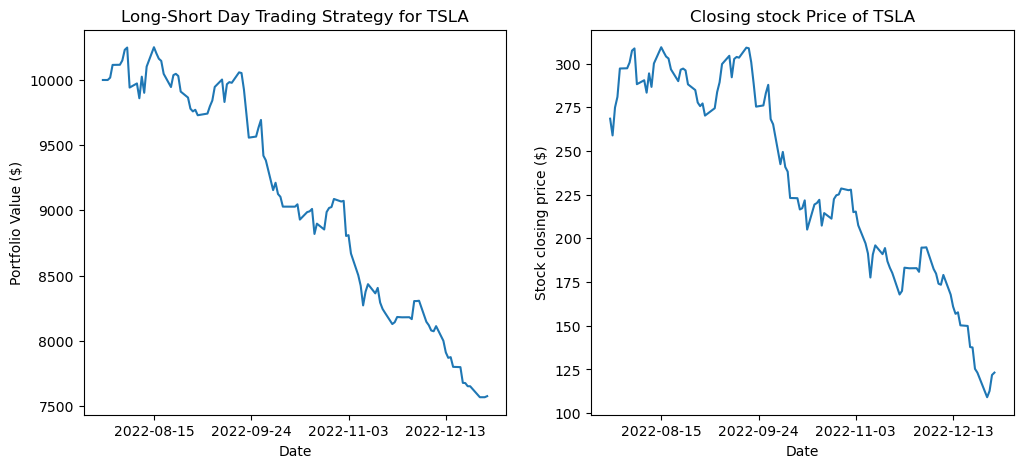

Profit or Loss: $-2425.38
Total Money: $7574.62


In [559]:
# Plot the portfolio value from the trading strategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot portfolio value
axs[0].plot(val_data['Date'], val_data['Portfolio Value'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Portfolio Value ($)')
axs[0].set_title('Long-Short Day Trading Strategy for TSLA')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Plot stock closing price
axs[1].plot(val_data['Date'], val_data['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock closing price ($)')
axs[1].set_title('Closing stock Price of TSLA')
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Show the plot
plt.show()

# Print the profit or loss from the trading strategy
print('Profit or Loss: ${:.2f}'.format(profit_loss))
print('Total Money: ${:.2f}'.format(initial_amount + profit_loss))

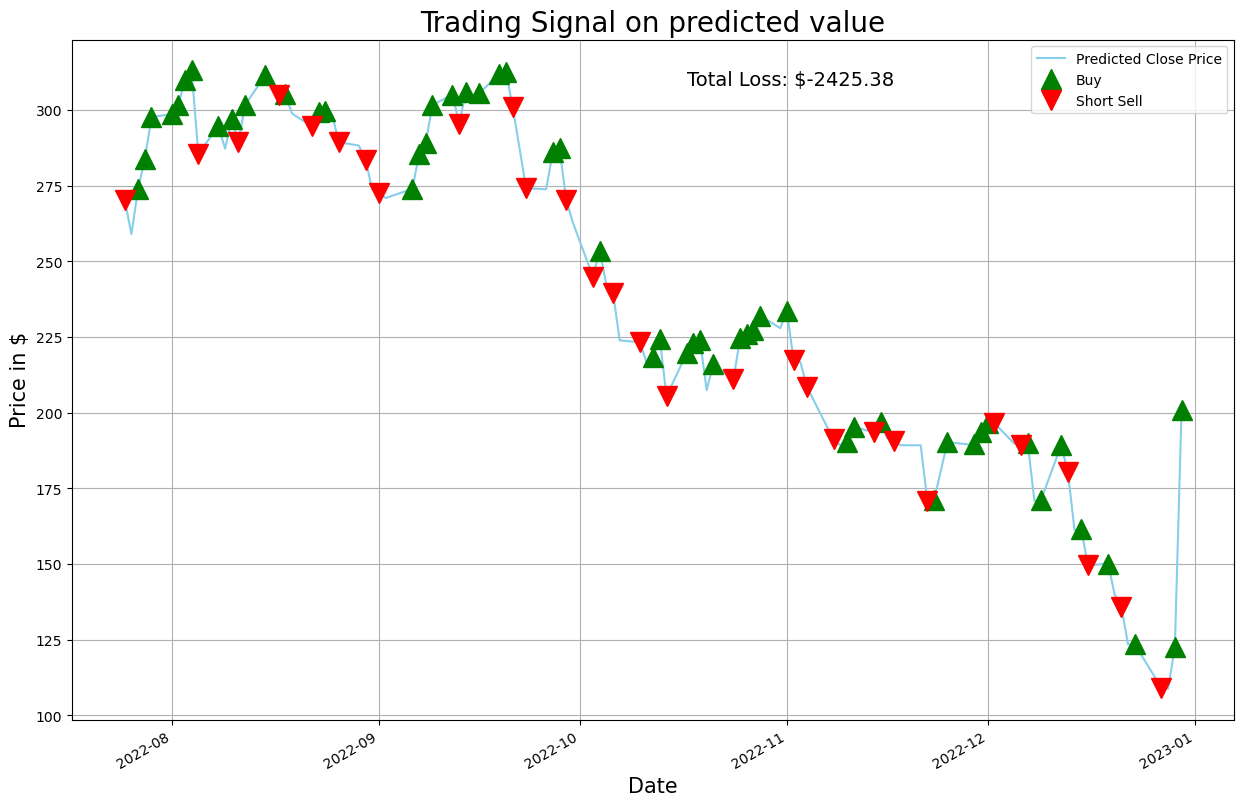

ValueError: Per-column arrays must each be 1-dimensional

In [560]:
if(val_data.index.name != 'Date'):
    val_data = val_data.set_index('Date')

plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
val_data['Predicted Adj Close'].plot(color = 'skyblue', label= 'Predicted Close Price') 
# plot ‘buy’ signals
plt.plot(val_data[val_data['Trade'] == 'Buy'][::1].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Buy'][::1], 
         '^', markersize = 15, color = 'g', label = 'Buy')
# plot ‘sell’ signals
plt.plot(val_data[val_data['Trade'] == 'Short Sell'][::2].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Short Sell'][::2], 
         'v', markersize = 15, color = 'r', label = 'Short Sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Trading Signal on predicted value', fontsize = 20)
plt.legend()
plt.grid()

if profit_loss > 0:
    pl_text = f"Total Profit: ${profit_loss:.2f}"
    pl_color = 'g'
else:
    pl_text = f"Total Loss: ${profit_loss:.2f}"
    pl_color = 'r'
    
plt.text(val_data.index[-30], val_data['Predicted Adj Close'].max(), pl_text,
         ha='right', va='top', fontsize=14)

plt.show()
# Create a DataFrame to store the predicted values
val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

# Linear Regression model

In [552]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Create benchmark linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


Train RMSE: 1.475450401371823e-13
Test RMSE: 9.466160198804795


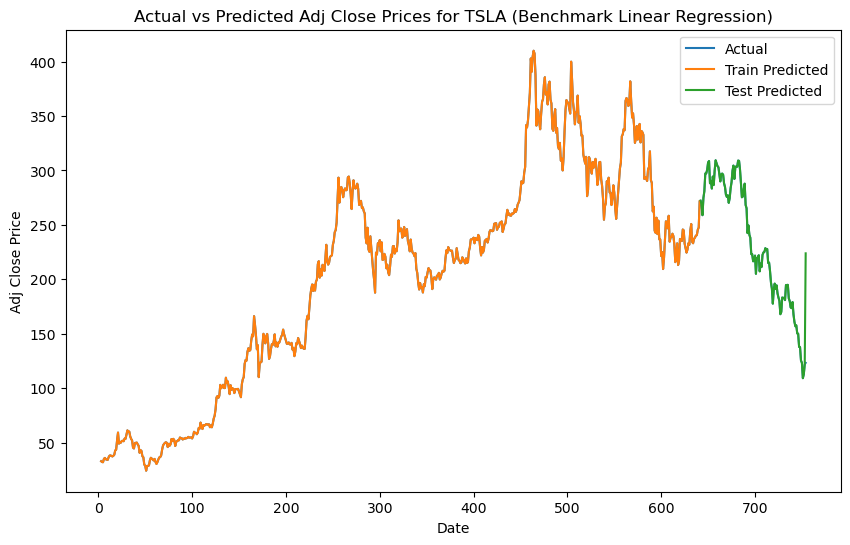

In [553]:

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA (Benchmark Linear Regression)')
plt.show()


# GARCH and KALMAN Filter

In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from arch import arch_model
from pykalman import KalmanFilter

# Load the data
# df_tsla = pd.read_csv('tsla-stock.csv')  # Replace with your own data file or data source

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Define GARCH model
garch = arch_model(y_train, p=1, q=1)

# Fit GARCH model
model = arch_model(y_train, p=1, q=1)
res = model.fit()

# Get the predicted volatility values using forecast method
forecast = res.forecast(start=len(X_train), horizon=len(X_test))

# Extract the predicted conditional volatilities
volatility = np.sqrt(forecast.variance.iloc[-1].values)

# Use the conditional variance as weights for Kalman Filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf.em(y_train.values.reshape(-1, 1))

# Extract the filtered state means as the predicted values
y_pred_train = kf.filtered_state_means.squeeze()
y_pred_test = kf.smoothed_state_means[-len(X_test):].squeeze()

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-4, 4, 9)}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_best.fit(X_train, y_train)
y_pred_ridge_train = ridge_best.predict(X_train)
y_pred_ridge_test = ridge_best.predict(X_test)

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': np.logspace(-4, 4, 9)}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_best.fit(X_train, y_train)
y_pred_lasso_train = lasso_best.predict(X_train)
y_pred_lasso_test = lasso_best.predict(X_test)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net_params = {'alpha': np.logspace(-4, 4, 9)}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train, y_train)
elastic_net_best = elastic_net_grid.best_estimator_
elastic_net_best.fit(X_train, y_train)
y_pred_elastic_net_train = elastic_net_best.predict(X_train)
y_pred_elastic_net_test = elastic_net_best.predict(X_test)

# Plot the predicted values and actual values for each model
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Actual Train', color='black')
plt.plot(y_test.index, y_test, label='Actual Test', color='blue')
plt.plot(y_train.index, y_pred_train, label='GARCH-KF', color='red')
plt.plot(y_test.index, y_pred_test, label='GARCH-KF', color='orange')
plt.plot(y_train.index, y_pred_ridge_train, label='Ridge Regression', color='green')
plt.plot(y_test.index, y_pred_ridge_test, label='Ridge Regression', color='purple')
plt.plot(y_train.index, y_pred_lasso_train, label='Lasso Regression', color='magenta')
plt.plot(y_test.index, y_pred_lasso_test, label='Lasso Regression', color='cyan')
plt.plot(y_train.index, y_pred_elastic_net_train, label='Elastic Net Regression', color='brown')
plt.plot(y_test.index, y_pred_elastic_net_test, label='Elastic Net Regression', color='pink')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Benchmark Study - Predicted vs Actual Values')
plt.legend()
plt.show()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 18290.41531147654
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3638.6930423555195
Iteration:      3,   Func. Count:     18,   Neg. LLF: 3515.1237888302735
Iteration:      4,   Func. Count:     24,   Neg. LLF: 3456.037865108276
Iteration:      5,   Func. Count:     29,   Neg. LLF: 3455.3336272329425
Iteration:      6,   Func. Count:     34,   Neg. LLF: 3455.095973914335
Iteration:      7,   Func. Count:     39,   Neg. LLF: 3454.8372767267547
Iteration:      8,   Func. Count:     44,   Neg. LLF: 3454.2980127309315
Iteration:      9,   Func. Count:     49,   Neg. LLF: 3453.8745465427546
Iteration:     10,   Func. Count:     54,   Neg. LLF: 3453.653556990732
Iteration:     11,   Func. Count:     59,   Neg. LLF: 3453.574612308803
Iteration:     12,   Func. Count:     64,   Neg. LLF: 3453.459410391074
Iteration:     13,   Func. Count:     69,   Neg. LLF: 3453.1580991939236
Iteration:     14,   Func. Count:     74,   Neg. LLF: 345

AttributeError: 'KalmanFilter' object has no attribute 'filtered_state_means'

In [392]:
# Create a DataFrame to store the predicted values
test_start_idx = X_train.shape[0]
test_end_idx = test_start_idx + X_test.shape[0]

val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

In [393]:
def generate_trading_signal(df):
    if df['Predicted Adj Close'] - df['Yest_Close'] > 0.01:
        return 1  # Buy the stock
    elif df['Predicted Adj Close'] - df['Yest_Close'] < -0.01:
        return -1  # Short sell the stock
    else:
        return 0  # Hold the stock

val_data['Yest_Close']  = val_data['Predicted Adj Close'].shift(1)

# Drop the first row, which has NaN values
val_data.dropna(inplace=True)

# Apply the trading signal function to the validation set
val_data['Trading Signal'] = val_data.apply(generate_trading_signal, axis=1)

# Calculate the daily returns from the trading strategy
val_data['Strategy Returns'] = val_data['Trading Signal'] * (val_data['Adj Close'] - val_data['Adj Close'].shift(1))

# Reduce risk by limiting maximum investment to a fraction of the portfolio value
initial_amount = 10000
max_investment = 0.1  # Maximum 10% of portfolio value per trade
total_shares = 0
portfolio_value = initial_amount

# Loop through validation data and execute trades
for i, row in val_data.iterrows():
    # Calculate maximum shares that can be bought based on available investment amount
    max_buy_shares = int(portfolio_value * max_investment / row['Adj Close'])
    if max_buy_shares == 0:
        # If there is not enough money left to buy any shares, skip the trade
        continue
    
    if row['Trading Signal'] == 1:
        # Buy the stock
        investment = max_investment * portfolio_value
        shares_bought = min(max_buy_shares, int(investment / row['Adj Close']))
        total_shares += shares_bought
        portfolio_value -= shares_bought * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    elif row['Trading Signal'] == -1:
        # Sell the stock
        shares_sold = min(total_shares, int(max_buy_shares))
        total_shares -= shares_sold
        portfolio_value += shares_sold * row['Adj Close']
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']
    else:
        # Hold the stock
        val_data.loc[i, 'Portfolio Value'] = portfolio_value + total_shares * row['Adj Close']

# Calculate the cumulative returns from the trading strategy
val_data['Cumulative Returns'] = (1 + val_data['Strategy Returns']).cumprod()

# Calculate the profit or loss from the trading strategy
profit_loss = val_data['Portfolio Value'].iloc[-1] - initial_amount

# Define a function to execute trades
def execute_trades(df):
    if df['Trading Signal'] == 1:
        return 'Buy'
    elif df['Trading Signal'] == -1:
        return 'Short Sell'
    else:
        return 'Hold'

# Apply the execute trades function to the validation set
val_data['Trade'] = val_data.apply(execute_trades, axis=1)

print(val_data)

val_data.dropna()

          Date   Adj Close  Predicted Adj Close  Yest_Close  Trading Signal  \
643 2022-07-25  268.433319           268.433323  272.243349              -1   
644 2022-07-26  258.859985           258.859992  268.433323              -1   
645 2022-07-27  274.820007           274.819999  258.859992               1   
646 2022-07-28  280.899994           280.899992  274.819999               1   
647 2022-07-29  297.149994           297.149980  280.899992               1   
..         ...         ...                  ...         ...             ...   
750 2022-12-23  123.150002           123.150005  125.350006              -1   
751 2022-12-27  109.099998           109.100005  123.150005              -1   
752 2022-12-28  112.709999           112.709997  109.100005               1   
753 2022-12-29  121.820000           121.819997  112.709997               1   
754 2022-12-30  123.180000           223.806574  121.819997               1   

     Strategy Returns  Portfolio Value  Cumulative 

,Date,Adj Close,Predicted Adj Close,Yest_Close,Trading Signal,Strategy Returns,Portfolio Value,Cumulative Returns,Trade
644,2022-07-26,258.859985,258.859992,268.433323,-1,9.573334,10000.000000,1.057333e+01,Short Sell
645,2022-07-27,274.820007,274.819999,258.859992,1,15.960022,10000.000000,1.793240e+02,Buy
646,2022-07-28,280.899994,280.899992,274.819999,1,6.079987,10018.239960,1.269611e+03,Buy
647,2022-07-29,297.149994,297.149980,280.899992,1,16.250000,10115.739960,2.190080e+04,Buy
648,2022-08-01,297.276672,297.276673,297.149980,1,0.126678,10116.753388,2.467516e+04,Buy
...,...,...,...,...,...,...,...,...,...
750,2022-12-23,123.150002,123.150005,125.350006,-1,2.199997,7647.379791,4.274703e+78,Short Sell
751,2022-12-27,109.099998,109.100005,123.150005,-1,14.050003,7647.379791,6.433430e+79,Short Sell
752,2022-12-28,112.709999,112.709997,109.100005,1,3.610001,7647.379791,2.965812e+80,Buy
753,2022-12-29,121.820000,121.819997,112.709997,1,9.110001,7702.039794,2.998436e+81,Buy


KeyError: 'Portfolio Value'

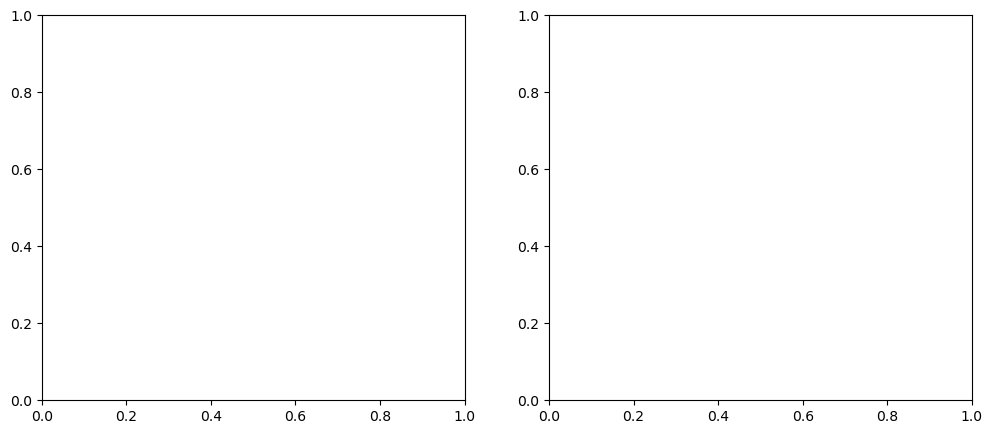

In [554]:
# Plot the portfolio value from the trading strategy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot portfolio value
axs[0].plot(val_data['Date'], val_data['Portfolio Value'])
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Portfolio Value ($)')
axs[0].set_title('Long-Short Day Trading Strategy for TSLA')
axs[0].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Plot stock closing price
axs[1].plot(val_data['Date'], val_data['Adj Close'])
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock closing price ($)')
axs[1].set_title('Closing stock Price of TSLA')
axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=40))  # Show only every 10th date on x-axis

# Show the plot
plt.show()

# Print the profit or loss from the trading strategy
print('Profit or Loss: ${:.2f}'.format(profit_loss))
print('Total Money: ${:.2f}'.format(initial_amount + profit_loss))

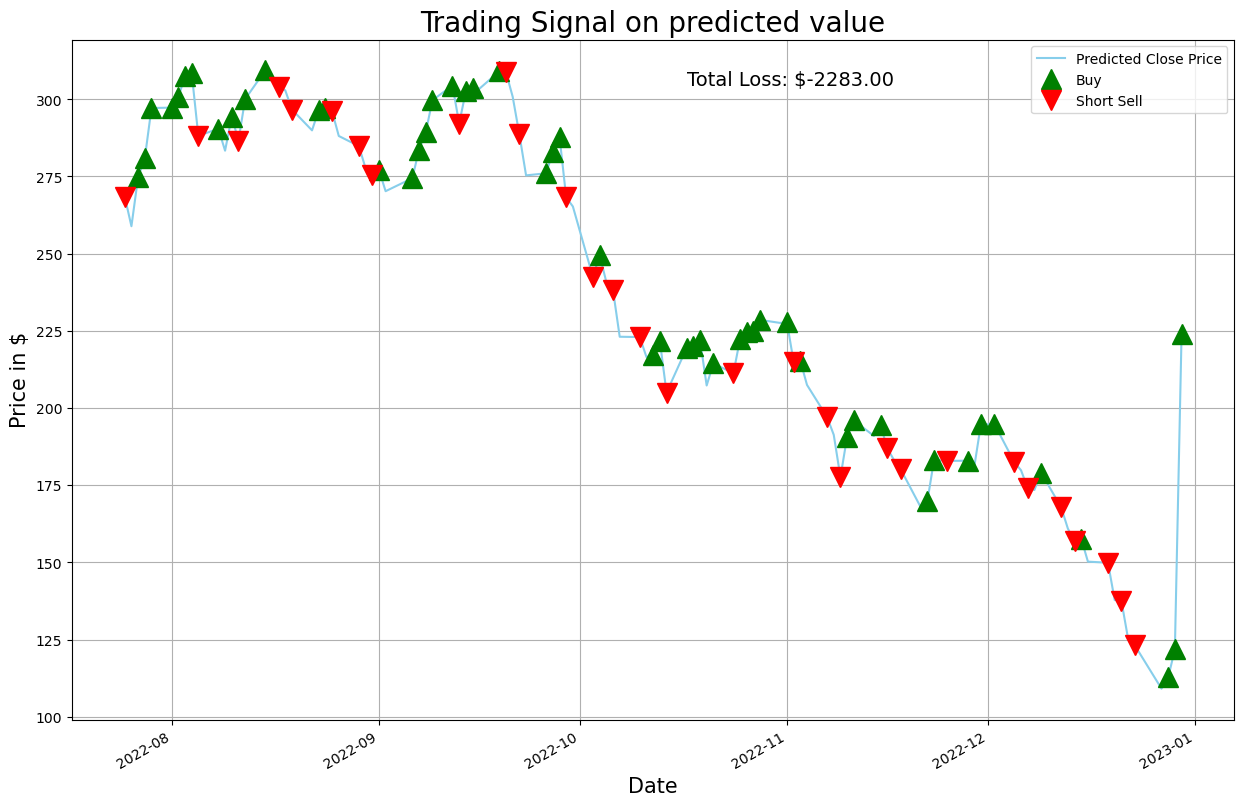

In [395]:
if(val_data.index.name != 'Date'):
    val_data = val_data.set_index('Date')

plt.figure(figsize = (15,10))
# plot close price, short-term and long-term moving averages 
val_data['Predicted Adj Close'].plot(color = 'skyblue', label= 'Predicted Close Price') 
# plot ‘buy’ signals
plt.plot(val_data[val_data['Trade'] == 'Buy'][::1].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Buy'][::1], 
         '^', markersize = 15, color = 'g', label = 'Buy')
# plot ‘sell’ signals
plt.plot(val_data[val_data['Trade'] == 'Short Sell'][::2].index, 
         val_data['Predicted Adj Close'][val_data['Trade'] == 'Short Sell'][::2], 
         'v', markersize = 15, color = 'r', label = 'Short Sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Trading Signal on predicted value', fontsize = 20)
plt.legend()
plt.grid()

if profit_loss > 0:
    pl_text = f"Total Profit: ${profit_loss:.2f}"
    pl_color = 'g'
else:
    pl_text = f"Total Loss: ${profit_loss:.2f}"
    pl_color = 'r'
    
plt.text(val_data.index[-30], val_data['Predicted Adj Close'].max(), pl_text,
         ha='right', va='top', fontsize=14)

plt.show()
# Create a DataFrame to store the predicted values
val_data = pd.DataFrame({'Date': data['Date'].iloc[test_start_idx:test_end_idx], 
                         'Adj Close': y_test, 
                         'Predicted Adj Close': y_pred})

# KALMAN FILTER

In [532]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define the state transition matrix
A = np.eye(3)

# Define the observation matrix
H = np.eye(1, 3, 0)

# Define the process noise covariance matrix
Q = np.eye(3) * 0.01

# Define the measurement noise covariance matrix
R = np.eye(1) * 0.1

# Initialize the Kalman filter
kf = KalmanFilter(transition_matrices=A, observation_matrices=H, transition_covariance=Q, observation_covariance=R)

# Train the Kalman filter on the training set
kf_state_means, kf_state_covs = kf.filter(y_train, X_train)

# Predict the Close values for the testing set
y_pred, _ = kf.filter_update(kf_state_means[-1], kf_state_covs[-1], X_test)
y_pred = y_pred.reshape((-1, 1))

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('RMSE:', rmse)

# Create a plot of Close vs predicted Close
plt.plot(y_test, label='Close')
plt.plot(y_pred, label='Predicted Close')
plt.legend()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'stock_data.csv'

In [551]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle = False)

# Define the state transition matrix
A = np.eye(3)

# Define the observation matrix
H = np.eye(1, 3, 0)

# Define the process noise covariance matrix
Q = np.eye(3) * 0.01

# Define the measurement noise covariance matrix
R = np.eye(1) * 0.1

# Initialize the Kalman filter
kf = KalmanFilter(transition_matrices=A, observation_matrices=H, transition_covariance=Q, observation_covariance=R)

# Train the Kalman filter on the training set
kf.em(y_train.values.reshape(-1, 1), n_iter=5)

# Predict the Close values for the testing set
y_pred = kf.smooth(y_test.values.reshape(-1, 1))[0]

y_pred = y_pred.iloc[:, 0]

# Calculate the root mean squared error
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('RMSE:', rmse)

# Create a plot of Close vs predicted Close
plt.plot(y_test, label='Close')
plt.plot(y_pred, label='Predicted Close')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

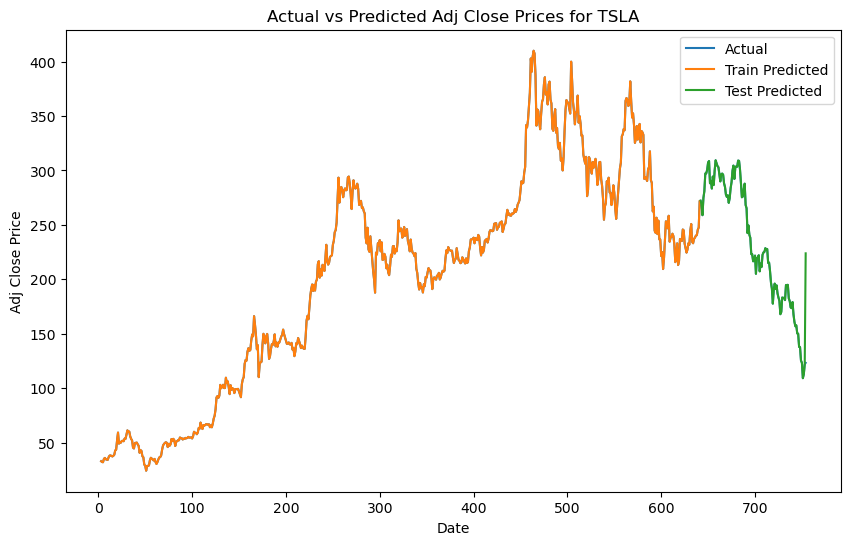

Train RMSE: 4.8469332949274394e-11
Test RMSE: 9.466160198808545


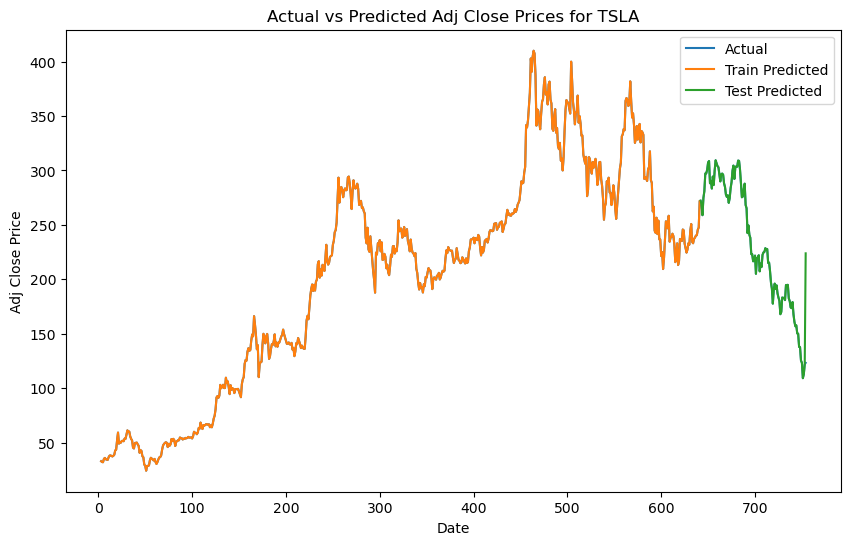

Train RMSE: 0.12489487167551203
Test RMSE: 8.894788822456055


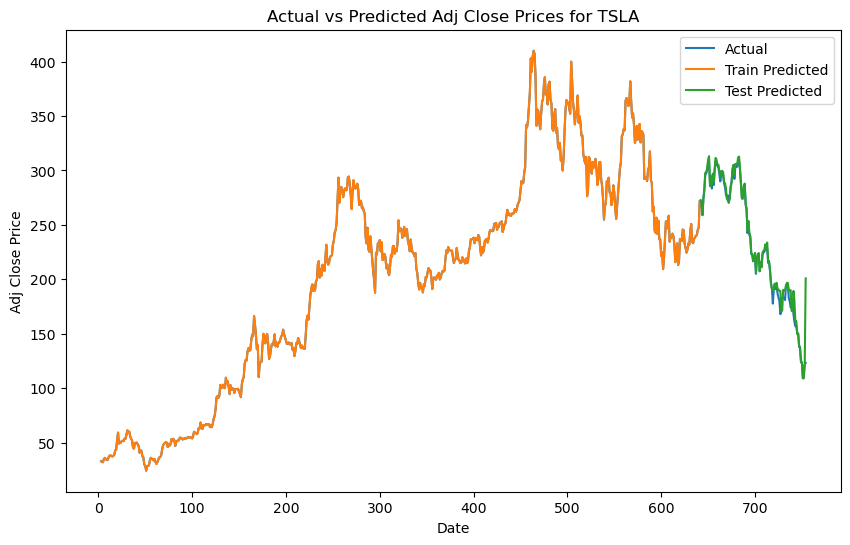

Train RMSE: 1.475450401371823e-13
Test RMSE: 9.466160198804795


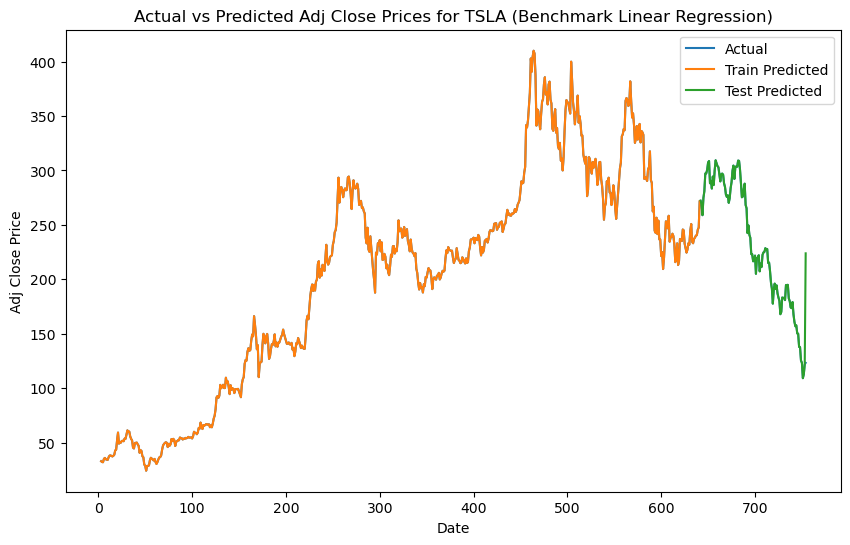

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18290.41531147654
Iteration:      2,   Func. Count:     12,   Neg. LLF: 3638.6930423555195
Iteration:      3,   Func. Count:     18,   Neg. LLF: 3515.1237888302735
Iteration:      4,   Func. Count:     24,   Neg. LLF: 3456.037865108276
Iteration:      5,   Func. Count:     29,   Neg. LLF: 3455.3336272329425
Iteration:      6,   Func. Count:     34,   Neg. LLF: 3455.095973914335
Iteration:      7,   Func. Count:     39,   Neg. LLF: 3454.8372767267547
Iteration:      8,   Func. Count:     44,   Neg. LLF: 3454.2980127309315
Iteration:      9,   Func. Count:     49,   Neg. LLF: 3453.8745465427546
Iteration:     10,   Func. Count:     54,   Neg. LLF: 3453.653556990732
Iteration:     11,   Func. Count:     59,   Neg. LLF: 3453.574612308803
Iteration:     12,   Func. Count:     64,   Neg. LLF: 3453.459410391074
Iteration:     13,   Func. Count:     69,   Neg. LLF: 3453.1580991939236
Iteration:     14,   Func. Count:     74,   Neg. LLF: 345

TypeError: em() got an unexpected keyword argument 'observation_covariance'

In [390]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()

# Least Angle Regression (LARS)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lars
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Create LARS regression model
model = Lars(fit_intercept=False)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()

# XGBoost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Create XGBoost regression model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)


# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA')
plt.show()


# Benchmark model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Create benchmark linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)



# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index, y, label='Actual')
plt.plot(X_train.index, y_pred_train, label='Train Predicted')
plt.plot(X_test.index, y_pred_test, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('Actual vs Predicted Adj Close Prices for TSLA (Benchmark Linear Regression)')
plt.show()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, Lars
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from arch import arch_model
from pykalman import KalmanFilter

# Prepare the feature matrix and target variable
X = data[[ 'Open', 'Yest_Close','OBV', 'Y_t-1_2', 'PC1', 'Y_t-1_3', 'Y_t-2', 'Y_t-3']]
y = data['Adj Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# Define GARCH model
garch = arch_model(y_train, p=1, q=1)

# Fit GARCH model
model = arch_model(y_train, p=1, q=1)
res = model.fit()

# Get the predicted volatility values using forecast method
forecast = res.forecast(start=len(X_train), horizon=len(X_test))

# Extract the predicted conditional volatilities
volatility = np.sqrt(forecast.variance.iloc[-1].values)

# Use the conditional variance as weights for Kalman Filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)
kf.em(y_train.values.reshape(-1, 1), observation_covariance=volatility.reshape(-1, 1))

# Extract the filtered state means as the predicted values
y_pred_train = kf.filtered_state_means.squeeze()
y_pred_test = kf.smoothed_state_means[-len(X_test):].squeeze()

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-4, 4, 9)}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_best.fit(X_train, y_train)
y_pred_ridge_train = ridge_best.predict(X_train)
y_pred_ridge_test = ridge_best.predict(X_test)

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': np.logspace(-4, 4, 9)}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_best.fit(X_train, y_train)
y_pred_lasso_train = lasso_best.predict(X_train)
y_pred_lasso_test = lasso_best.predict(X_test)

# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net_params = {'alpha': np.logspace(-4, 4, 9)}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid.fit(X_train, y_train)
elastic_net_best = elastic_net_grid.best_estimator_
elastic_net_best.fit(X_train, y_train)
y_pred_elastic_net_train = elastic_net_best.predict(X_train)
y_pred_elastic_net_test = elastic_net_best.predict(X_test)

# Plot the predicted values and actual values for each model
plt.figure(figsize=(12, 8))
plt.plot(y_train.index, y_train, label='Actual Train', color='black')
plt.plot(y_test.index, y_test, label='Actual Test', color='blue')
plt.plot(y_train.index, y_pred_train, label='GARCH-KF', color='red')
plt.plot(y_test.index, y_pred_test, label='GARCH-KF', color='orange')
plt.plot(y_train.index, y_pred_ridge_train, label='Ridge Regression', color='green')
plt.plot(y_test.index, y_pred_ridge_test, label='Ridge Regression', color='purple')
plt.plot(y_train.index, y_pred_lasso_train, label='Lasso Regression', color='magenta')
plt.plot(y_test.index, y_pred_lasso_test, label='Lasso Regression', color='cyan')
plt.plot(y_train.index, y_pred_elastic_net_train, label='Elastic Net Regression', color='brown')
plt.plot(y_test.index, y_pred_elastic_net_test, label='Elastic Net Regression', color='pink')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Benchmark Study - Predicted vs Actual Values')
plt.legend()
plt.show()
